<center> <h1> <FONT FACE="Times new roman">Modelado de viscosidad para mezclas binariasde hidrocarburos</FONT> </h1> </center


**Autor**: German Eduaro Hernández Rivera

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from  sklearn.metrics import r2_score
from scipy.optimize import minimize

In [2]:
#DBT puro
DBT_VPURE=pd.read_excel(r"D:\Escritorio\TRABAJO DE GRADO\DBT DATA ASPEN PLUS.xlsx",sheet_name="VISC")

In [3]:
#CICLOHEXANO
DATA_CH=pd.read_excel(r"D:\Escritorio\TRABAJO DE GRADO\DATOS ORGANIZADOS.xlsx",sheet_name="TABLA CH")
S_PURACH=DATA_CH[1:18]
MIX_C1CH=DATA_CH[19:36] #0.1503 m
MIX_C2CH=DATA_CH[37:54] #0.2277 m
MIX_C3CH=DATA_CH[55:72] #0.3044 m
DATA_CH

,T,rho,u,ks,nD,Rm,visc,Vm,ksm
0,Ciclohexano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,298.15,0.77397,1255.60,819.545856,1.423466,27.71617,0.8947,108.737420,0.891153
2,300.65,0.77160,1243.20,838.543850,1.422068,27.72067,0.8564,109.071410,0.914612
3,303.15,0.76923,1230.89,858.035585,1.420658,27.72493,0.8233,109.407460,0.938755
4,305.65,0.76685,1218.65,878.074960,1.419251,27.72942,0.7906,109.747020,0.963661
...,...,...,...,...,...,...,...,...,...
67,328.15,0.76065,1122.55,1043.286871,1.416258,29.20128,0.5988,115.471676,1.262059
68,330.65,0.75822,1111.28,1067.966838,1.414900,29.21365,0.5796,115.852601,1.297016
69,333.15,0.75578,1100.09,1093.322211,1.413503,29.22401,0.5596,116.237618,1.333223
70,335.65,0.75333,1088.94,1119.455502,1.412175,29.23904,0.5418,116.626784,1.370683


In [4]:
#TOLUENO
DATA_T=pd.read_excel(r"D:\Escritorio\TRABAJO DE GRADO\DATOS ORGANIZADOS.xlsx",sheet_name="TABLA T")
S_PURAT=DATA_T[1:18]
MIX_C1T=DATA_T[19:36] #0.1503 m
MIX_C2T=DATA_T[37:54] #0.2277 m
MIX_C3T=DATA_T[55:72] #0.3044 m
DATA_T

,T,rho,u,ks,nD,Rm,visc,Vm,ksm
0,Tolueno,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,298.15,0.862309,1306.340,679.554241,1.493962,31.104478,0.5552,106.850670,0.726108
2,300.65,0.859973,1295.460,692.897004,1.492539,31.112764,0.5400,107.141410,0.742380
3,303.15,0.857635,1284.630,706.543413,1.491085,31.118982,0.5245,107.432490,0.759057
4,305.65,0.855295,1273.860,720.506871,1.489645,31.126269,0.5096,107.726410,0.776176
...,...,...,...,...,...,...,...,...,...
67,328.15,0.847240,1189.150,834.680501,1.484684,32.435003,0.4271,113.233885,0.976889
68,330.65,0.844870,1178.925,851.604124,1.483238,32.445444,0.4158,113.559293,0.999976
69,333.15,0.842500,1168.730,868.963844,1.481785,32.455396,0.4052,113.886577,1.023751
70,335.65,0.840120,1158.580,886.761076,1.480335,32.465910,0.3953,114.217134,1.048228


In [5]:
#BENCENO
DATA_B=pd.read_excel(r"D:\Escritorio\TRABAJO DE GRADO\DATOS ORGANIZADOS.xlsx",sheet_name="TABLA B")
S_PURAB=DATA_B[1:18]
MIX_C1B=DATA_B[19:36] #0.1503 m
MIX_C2B=DATA_B[37:54] #0.2277 m
MIX_C3B=DATA_B[55:72] #0.3044 m
DATA_B

,T,rho,u,ks,nD,Rm,visc,Vm,ksm
0,Benceno,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,298.15,0.87370,1301.460,675.734379,1.497432,26.180629,0.6072,89.403460,0.604130
2,300.65,0.87102,1289.670,690.263132,1.495788,26.187536,0.5851,89.678540,0.619018
3,303.15,0.86834,1277.980,705.118449,1.494156,26.194937,0.5652,89.955320,0.634292
4,305.65,0.86566,1265.990,720.762361,1.492496,26.201026,0.5463,90.233810,0.650371
...,...,...,...,...,...,...,...,...,...
67,328.15,0.85664,1175.565,844.711401,1.487474,27.633874,0.4468,96.001896,0.843287
68,330.65,0.85395,1164.660,863.314901,1.485823,27.643840,0.4331,96.314434,0.865340
69,333.15,0.85125,1153.790,882.448428,1.484157,27.653630,0.4180,96.631327,0.888167
70,335.65,0.84854,1142.925,902.177965,1.482505,27.664144,0.4061,96.950311,0.911694


In [6]:
#OCTANO
DATA_O=pd.read_excel(r"D:\Escritorio\TRABAJO DE GRADO\DATOS ORGANIZADOS.xlsx",sheet_name="TABLA O")
S_PURAO=DATA_O[1:18]
MIX_C1O=DATA_O[19:36] #0.1503 m
MIX_C2O=DATA_O[37:54] #0.2277 m
MIX_C3O=DATA_O[55:72] #0.3044 m
DATA_O

,T,rho,u,ks,nD,Rm,visc,Vm,ksm
0,Octano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,298.15,0.698720,1173.930,1038.514161,1.395257,39.216085,0.5129,163.482510,1.697789
2,300.65,0.696710,1163.550,1060.175723,1.394076,39.225117,0.4982,163.954160,1.738202
3,303.15,0.694690,1153.190,1082.448436,1.392876,39.232998,0.4834,164.430900,1.779880
4,305.65,0.692660,1142.890,1105.276728,1.391643,39.238469,0.4699,164.912800,1.822743
...,...,...,...,...,...,...,...,...,...
67,328.15,0.687087,1061.155,1292.494557,1.388024,40.595376,0.3864,172.027401,2.307056
68,330.65,0.684971,1051.320,1320.865498,1.386861,40.612655,0.3763,172.559771,2.365960
69,333.15,0.682836,1041.505,1350.076345,1.385703,40.629675,0.3662,173.092864,2.426692
70,335.65,0.680700,1031.710,1380.158516,1.384413,40.634350,0.3580,173.629261,2.489443


# Modelado de la viscosidad

## Ciclohexano-DBT 0.1503 m

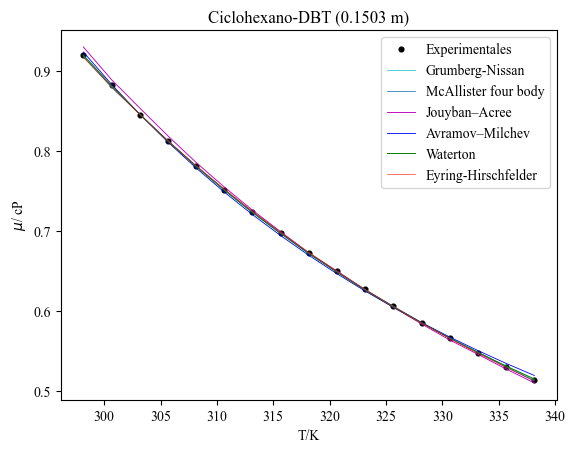

({'PAR_GN': array([-0.70504674,  0.01940932]),
  'PAR_JA': array([ 625.94637811, -608.30370975,  595.09658525]),
  'PAR_MC': array([-5.85204291e+01,  7.44100164e+02,  2.14588269e+03, -5.50324731e+00,
          6.06042257e+00, -1.55423255e-02]),
  'PAR_AVM': array([1.29380313e-01, 2.81524887e+02, 2.75154072e+00]),
  'PAR_WT': array([2.43645376e-02, 3.13233608e+02, 1.21141711e+02]),
  'PAR_EH': array([1.46566177e+03, 2.93027744e+02, 5.00000000e-01])},
       T[K]  visc_exp   visc_GN   visc_JA   visc_MC  visc_AVM   visc_WT  \
 0   298.15    0.9200  0.920315  0.930645  0.918778  0.924330  0.920403   
 1   300.65    0.8825  0.880957  0.889765  0.880144  0.883956  0.882242   
 2   303.15    0.8455  0.846917  0.854356  0.846584  0.846506  0.846455   
 3   305.65    0.8124  0.813314  0.819479  0.813410  0.811712  0.812856   
 4   308.15    0.7811  0.781263  0.786255  0.781700  0.779336  0.781277   
 5   310.65    0.7516  0.751576  0.755490  0.752237  0.749165  0.751564   
 6   313.15    0.7241

In [7]:
def GNissanC1(v_0):
    #Ciclohexano-DBT
    T=MIX_C1CH["T"].to_numpy(dtype=float)
    mix_exp=MIX_C1CH["visc"].to_numpy(dtype=float)
    x1=0.0125 #DBT
    x2=1-x1
    mu1=DBT_VPURE["Viscosity (Liquid vs. Gas ) (N-sec/sqm)"].to_numpy(dtype=float)
    mu2=S_PURACH["visc"].to_numpy(dtype=float)
    G1 = v_0[0] ; G2 = v_0[1]
    G12 = G1 + G2 * T
    mix_teo=np.exp(x1*np.log(mu1)+x2*np.log(mu2)+x1*x2*G12)
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
#. Jouyban–Acree Viscosity Mode
def J_AcreeC1(v_0):
    #Ciclohexano-DBT
    T=MIX_C1CH["T"].to_numpy(dtype=float)
    mix_exp=MIX_C1CH["visc"].to_numpy(dtype=float)
    x1=0.0125 #DBT
    x2=1-x1
    mu1=DBT_VPURE["Viscosity (Liquid vs. Gas ) (N-sec/sqm)"].to_numpy(dtype=float)
    mu2=S_PURACH["visc"].to_numpy(dtype=float)
    A0 = v_0[0] ; A1 = v_0[1]; A2 = v_0[2]
    l1=np.log(mu1) ; l2=np.log(mu2)
    mix_teo=np.exp(x1*l1+x2*l2+A0*(x1*x2/T)+A1*((x1*x2*(x1-x2))/T)+A2*((x1*x2*(x1-x2)**2)/T))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f    
#Mcallister 4
def MC4BC1(v_0):
    M1=184.26 ; M2=84.16 
    T=MIX_C1CH["T"].to_numpy(dtype=float)
    mix_exp=MIX_C1CH["visc"].to_numpy(dtype=float)
    x1=0.0125 #DBT
    x2=1-x1
    mu1=DBT_VPURE["Viscosity (Liquid vs. Gas ) (N-sec/sqm)"].to_numpy(dtype=float)
    mu2=S_PURACH["visc"].to_numpy(dtype=float)
    K1=v_0[0] ; K2=v_0[1] ; K3=v_0[2]; K4=v_0[3]; K5=v_0[4]; K6=v_0[5]
    n1=K1+K2*T #n1112
    n2=K3+K4*T #n1122
    n3=K5+K6*T #n2221
    RM=M2/M1
    mix_teo=np.exp(x1**4*np.log(mu1)+4*x1**3*x2*np.log(n1)+6*x1**2*x2**2*np.log(n2)+4*x1*x2**3*np.log(n3)+
                  x2**4*np.log(mu2)-np.log(x1+x2*RM)+4*x1**3*x2*np.log((3+RM)/4)+6*x1**2*x2**2*np.log((1+RM)/2)+
                  4*x1*x2**3*np.log((1+3*RM)/4)+x2**4*np.log(RM))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
#Avramov Milchev
def AM(v_0):
    #Ciclohexano-DBT
    #298.15 K de temperatura
    T=MIX_C1CH["T"].to_numpy(dtype=float)
    mix_exp=MIX_C1CH["visc"].to_numpy()
    n=v_0[0] ;tao=v_0[1]; alpha=v_0[2]
    mix_teo=n*(10**((tao/T)**alpha))
    #10**(np.log10(n)+((tao/T)**alpha))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
#Waterton
def CM(v_0):
    #Ciclohexano-DBT
    #298.15 K de temperatura
    T=MIX_C1CH["T"].to_numpy(dtype=float)
    mix_exp=MIX_C1CH["visc"].to_numpy()
    n=v_0[0] ;k=v_0[1]; c=v_0[2]
    mix_teo=n*(10**((k*np.exp(c/T))/T))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
#Eyring-Hirschfelder
def EH(v_0):
    #Ciclohexano-DBT
    #298.15 K de temperatura
    T=MIX_C1CH["T"].to_numpy(dtype=float)
    mix_exp=MIX_C1CH["visc"].to_numpy()
    ER=v_0[0] ;TA=v_0[1]
    mix_teo=np.exp(ER*((1/T)-(1/TA)))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
def GModel_0(v_0,v_2,v_3,v_6):
    mix_exp=MIX_C1CH["visc"].to_numpy()
    T=MIX_C1CH["T"].to_numpy(dtype=float)
    #Parámetros G-Nissan
    x1=0.0125 #DBT
    x2=1-x1
    mu1=DBT_VPURE["Viscosity (Liquid vs. Gas ) (N-sec/sqm)"].to_numpy(dtype=float)
    mu2=S_PURACH["visc"].to_numpy(dtype=float)
    G1=minimize(GNissanC1,v_2,method="CG").x[0]
    G2=minimize(GNissanC1,v_2,method="CG").x[1]
    G12 = G1 + G2 * T    
    #Parámetros Jouyban–Acree
    A0 = minimize(J_AcreeC1,v_3,method="CG").x[0] 
    A1 = minimize(J_AcreeC1,v_3,method="CG").x[1]
    A2 = minimize(J_AcreeC1,v_3,method="CG").x[2]
    l1=np.log(mu1) ; l2=np.log(mu2)
    #Parámetros MC4
    M1=184.26 ; M2=84.16 
    K1=minimize(MC4BC1,v_6,method="Nelder-Mead").x[0]  ; K2=minimize(MC4BC1,v_6,method="Nelder-Mead").x[1] 
    K3=minimize(MC4BC1,v_6,method="Nelder-Mead").x[2]; K4=minimize(MC4BC1,v_6,method="Nelder-Mead").x[3]
    K5=minimize(MC4BC1,v_6,method="Nelder-Mead").x[4]; K6=minimize(MC4BC1,v_6,method="Nelder-Mead").x[5]
    n1=K1+K2*T #n1112
    n2=K3+K4*T #n1122
    n3=K5+K6*T #n2221
    RM=M2/M1
    #Parámetros AM
    n=minimize(AM,v_0,method="CG").x[0]
    tao=minimize(AM,v_0,method="CG").x[1]
    alpha=minimize(AM,v_0,method="CG").x[2]
    #Parámetros Waterton
    nC=minimize(CM,v_0,method="CG").x[0]
    k=minimize(CM,v_0,method="CG").x[1]
    c=minimize(CM,v_0,method="CG").x[2]    
    #Parámetros Eyring-Hirschfelder
    ER=minimize(EH,v_0).x[0]; TA=minimize(EH,v_0).x[1]
    mix_teoGN=np.exp(x1*np.log(mu1)+x2*np.log(mu2)+x1*x2*G12)
    mix_teoJA=np.exp(x1*l1+x2*l2+A0*(x1*x2/T)+A1*((x1*x2*(x1-x2))/T)+A2*((x1*x2*(x1-x2)**2)/T))   
    mix_teoMC=np.exp(x1**4*np.log(mu1)+4*x1**3*x2*np.log(n1)+6*x1**2*x2**2*np.log(n2)+4*x1*x2**3*np.log(n3)+
                  x2**4*np.log(mu2)-np.log(x1+x2*RM)+4*x1**3*x2*np.log((3+RM)/4)+6*x1**2*x2**2*np.log((1+RM)/2)+
                  4*x1*x2**3*np.log((1+3*RM)/4)+x2**4*np.log(RM))        
    mix_teoAM=n*(10**((tao/T)**alpha))
    mix_teoCM=nC*(10**((k*np.exp(c/T))/T))
    mix_teoEH=np.exp(ER*((1/T)-(1/TA)))
    plt.rcParams["font.family"] = "Times New Roman"
    plt.plot(T,mix_exp,"ko",markersize=3.4,label="Experimentales")
    plt.plot(T,mix_teoGN,"c-",label="Grumberg-Nissan",linewidth=0.5)        
    plt.plot(T,mix_teoMC,"-",label="McAllister four body",linewidth=0.55)        
    plt.plot(T,mix_teoJA,"m-",label="Jouyban–Acree",linewidth=0.65)        
    plt.plot(T,mix_teoAM,"b-",label="Avramov–Milchev",linewidth=0.6)
    plt.plot(T,mix_teoCM,"g-",label="Waterton",linewidth=0.7)
    plt.plot(T,mix_teoEH,"r-",label="Eyring-Hirschfelder",linewidth=0.4)
    plt.title("Ciclohexano-DBT (0.1503 m)")
    plt.legend(loc="best")
    plt.xlabel("T/K")
    plt.ylabel("$\mu$/ cP")
    plt.savefig("Modelo_CHDBTC1.svg")
    plt.show()
    df_visc=pd.DataFrame({"T[K]":T,"visc_exp":mix_exp,"visc_GN":mix_teoGN,"visc_JA":mix_teoJA,"visc_MC":mix_teoMC,"visc_AVM":mix_teoAM,"visc_WT":mix_teoCM,"visc_EH":mix_teoEH,
                         "SSRES_GN":minimize(GNissanC1,v_2,method="CG").fun,"SSRES_JA":minimize(J_AcreeC1,v_3,method="CG").fun,"SSRES_MC":minimize(MC4BC1,v_6,method="Nelder-Mead").fun,
                          "SSRES_AVM":minimize(AM,v_0,method="CG").fun,"SSRES_WT":minimize(CM,v_0,method="CG").fun,"SSRES_EH":minimize(EH,v_0).fun})
    df_params={"PAR_GN":minimize(GNissanC1,v_2,method="CG").x,"PAR_JA":minimize(J_AcreeC1,v_3,method="CG").x,"PAR_MC":minimize(MC4BC1,v_6,method="Nelder-Mead").x,
                          "PAR_AVM":minimize(AM,v_0,method="CG").x,"PAR_WT":minimize(CM,v_0,method="CG").x,"PAR_EH":minimize(EH,v_0).x}    
    #df_visc.to_excel("Modelo_CHDBTC1.xlsx")
    return df_params,df_visc                            
MM_0=GModel_0([0.001,20,0.5],[1,1],[1,1,1],[-8.66725233e-01,  2.41034251e+01, -1.68137883e+01,  3.52159446e+00,
        6.05748701e+00, -1.55973884e-02])
MM_0

## Tolueno-DBT 0.1373 m

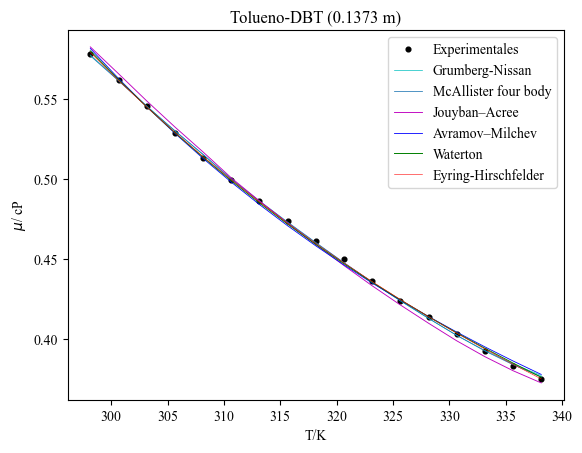

({'PAR_GN': array([-1.75263913,  0.02432548]),
  'PAR_JA': array([ 666.87764039, -874.26617337,  347.99906246]),
  'PAR_MC': array([-9.70105274e-01,  5.92939637e+01, -2.32854115e+01,  3.25069756e-01,
          4.14005423e+00, -1.00097096e-02]),
  'PAR_AVM': array([1.08967880e-01, 2.60577377e+02, 2.36399753e+00]),
  'PAR_WT': array([3.22892207e-02, 2.74423123e+02, 9.23080241e+01]),
  'PAR_EH': array([1.09442019e+03, 2.59522371e+02, 5.00000000e-01])},
       T[K]  visc_exp   visc_GN   visc_JA   visc_MC  visc_AVM   visc_WT  \
 0   298.15    0.5778  0.577485  0.582534  0.577017  0.581559  0.580073   
 1   300.65    0.5616  0.561672  0.565798  0.561398  0.562831  0.562151   
 2   303.15    0.5458  0.545568  0.548819  0.545481  0.545198  0.545141   
 3   305.65    0.5285  0.530096  0.532526  0.530155  0.528578  0.528982   
 4   308.15    0.5132  0.515253  0.516913  0.515422  0.512895  0.513619   
 5   310.65    0.4992  0.499807  0.500742  0.500093  0.498081  0.499000   
 6   313.15    0.4863

In [8]:
def GNissanC1(v_0):
    #Tolueno-DBT
    T=MIX_C1T["T"].to_numpy(dtype=float)
    mix_exp=MIX_C1T["visc"].to_numpy(dtype=float)
    x1=0.0125 #DBT
    x2=1-x1
    mu1=DBT_VPURE["Viscosity (Liquid vs. Gas ) (N-sec/sqm)"].to_numpy(dtype=float)
    mu2=S_PURAT["visc"].to_numpy(dtype=float)
    G1 = v_0[0] ; G2 = v_0[1]
    G12 = G1 + G2 * T
    mix_teo=np.exp(x1*np.log(mu1)+x2*np.log(mu2)+x1*x2*G12)
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
#. Jouyban–Acree Viscosity Mode
def J_AcreeC1(v_0):
    #Tolueno-DBT
    T=MIX_C1T["T"].to_numpy(dtype=float)
    mix_exp=MIX_C1T["visc"].to_numpy(dtype=float)
    x1=0.0125 #DBT
    x2=1-x1
    mu1=DBT_VPURE["Viscosity (Liquid vs. Gas ) (N-sec/sqm)"].to_numpy(dtype=float)
    mu2=S_PURAT["visc"].to_numpy(dtype=float)
    A0 = v_0[0] ; A1 = v_0[1]; A2 = v_0[2]
    l1=np.log(mu1) ; l2=np.log(mu2)
    mix_teo=np.exp(x1*l1+x2*l2+A0*(x1*x2/T)+A1*((x1*x2*(x1-x2))/T)+A2*((x1*x2*(x1-x2)**2)/T))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f    
#Mcallister 4
def MC4BC1(v_0):
    M1=184.26 ; M2=92.14
    T=MIX_C1T["T"].to_numpy(dtype=float)
    mix_exp=MIX_C1T["visc"].to_numpy(dtype=float)
    x1=0.0125 #DBT
    x2=1-x1
    mu1=DBT_VPURE["Viscosity (Liquid vs. Gas ) (N-sec/sqm)"].to_numpy(dtype=float)
    mu2=S_PURAT["visc"].to_numpy(dtype=float)
    K1=v_0[0] ; K2=v_0[1] ; K3=v_0[2]; K4=v_0[3]; K5=v_0[4]; K6=v_0[5]
    n1=K1+K2*T #n1112
    n2=K3+K4*T #n1122
    n3=K5+K6*T #n2221
    RM=M2/M1
    mix_teo=np.exp(x1**4*np.log(mu1)+4*x1**3*x2*np.log(n1)+6*x1**2*x2**2*np.log(n2)+4*x1*x2**3*np.log(n3)+
                  x2**4*np.log(mu2)-np.log(x1+x2*RM)+4*x1**3*x2*np.log((3+RM)/4)+6*x1**2*x2**2*np.log((1+RM)/2)+
                  4*x1*x2**3*np.log((1+3*RM)/4)+x2**4*np.log(RM))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
#Avramov Milchev
def AM(v_0):
    #Tolueno-DBT
    #298.15 K de temperatura
    T=MIX_C1T["T"].to_numpy(dtype=float)
    mix_exp=MIX_C1T["visc"].to_numpy()
    n=v_0[0] ;tao=v_0[1]; alpha=v_0[2]
    mix_teo=n*(10**((tao/T)**alpha))
    #10**(np.log10(n)+((tao/T)**alpha))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
#Waterton
def CM(v_0):
    #Ciclohexano-DBT
    #298.15 K de temperatura
    T=MIX_C1T["T"].to_numpy(dtype=float)
    mix_exp=MIX_C1T["visc"].to_numpy()
    n=v_0[0] ;k=v_0[1]; c=v_0[2]
    mix_teo=n*(10**((k*np.exp(c/T))/T))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
#Eyring-Hirschfelder
def EH(v_0):
    #Ciclohexano-DBT
    #298.15 K de temperatura
    T=MIX_C1T["T"].to_numpy(dtype=float)
    mix_exp=MIX_C1T["visc"].to_numpy()
    ER=v_0[0] ;TA=v_0[1]
    mix_teo=np.exp(ER*((1/T)-(1/TA)))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
def GModel_1(v_0,v_2,v_3,v_6):
    mix_exp=MIX_C1T["visc"].to_numpy()
    T=MIX_C1T["T"].to_numpy(dtype=float)
    #Parámetros G-Nissan
    x1=0.0125 #DBT
    x2=1-x1
    mu1=DBT_VPURE["Viscosity (Liquid vs. Gas ) (N-sec/sqm)"].to_numpy(dtype=float)
    mu2=S_PURAT["visc"].to_numpy(dtype=float)
    G1=minimize(GNissanC1,v_2,method="CG").x[0]
    G2=minimize(GNissanC1,v_2,method="CG").x[1]
    G12 = G1 + G2 * T    
    #Parámetros Jouyban–Acree
    A0 = minimize(J_AcreeC1,v_3,method="Nelder-Mead").x[0] 
    A1 = minimize(J_AcreeC1,v_3,method="Nelder-Mead").x[1]
    A2 = minimize(J_AcreeC1,v_3,method="Nelder-Mead").x[2]
    l1=np.log(mu1) ; l2=np.log(mu2)
    #Parámetros MC4
    M1=184.26 ; M2=92.14
    K1=minimize(MC4BC1,v_6,method="Nelder-Mead").x[0]  ; K2=minimize(MC4BC1,v_6,method="Nelder-Mead").x[1] 
    K3=minimize(MC4BC1,v_6,method="Nelder-Mead").x[2]; K4=minimize(MC4BC1,v_6,method="Nelder-Mead").x[3]
    K5=minimize(MC4BC1,v_6,method="Nelder-Mead").x[4]; K6=minimize(MC4BC1,v_6,method="Nelder-Mead").x[5]
    n1=K1+K2*T #n1112
    n2=K3+K4*T #n1122
    n3=K5+K6*T #n2221
    RM=M2/M1    
    #Parámetros AM
    n=minimize(AM,v_0,method="CG").x[0]
    tao=minimize(AM,v_0,method="CG").x[1]
    alpha=minimize(AM,v_0,method="CG").x[2]        
    #Parámetros Waterton
    nC=minimize(CM,v_0,method="CG").x[0]
    k=minimize(CM,v_0,method="CG").x[1]
    c=minimize(CM,v_0,method="CG").x[2]    
    #Parámetros Eyring-Hirschfelder
    ER=minimize(EH,v_0).x[0]; TA=minimize(EH,v_0).x[1]
    mix_teoAM=n*(10**((tao/T)**alpha))
    mix_teoCM=nC*(10**((k*np.exp(c/T))/T))
    mix_teoEH=np.exp(ER*((1/T)-(1/TA)))
    mix_teoGN=np.exp(x1*np.log(mu1)+x2*np.log(mu2)+x1*x2*G12)
    mix_teoJA=np.exp(x1*l1+x2*l2+A0*(x1*x2/T)+A1*((x1*x2*(x1-x2))/T)+A2*((x1*x2*(x1-x2)**2)/T))   
    mix_teoMC=np.exp(x1**4*np.log(mu1)+4*x1**3*x2*np.log(n1)+6*x1**2*x2**2*np.log(n2)+4*x1*x2**3*np.log(n3)+
                  x2**4*np.log(mu2)-np.log(x1+x2*RM)+4*x1**3*x2*np.log((3+RM)/4)+6*x1**2*x2**2*np.log((1+RM)/2)+
                  4*x1*x2**3*np.log((1+3*RM)/4)+x2**4*np.log(RM))            
    plt.rcParams["font.family"] = "Times New Roman"
    plt.plot(T,mix_exp,"ko",markersize=3.4,label="Experimentales")
    plt.plot(T,mix_teoGN,"c-",label="Grumberg-Nissan",linewidth=0.5)        
    plt.plot(T,mix_teoMC,"-",label="McAllister four body",linewidth=0.55)        
    plt.plot(T,mix_teoJA,"m-",label="Jouyban–Acree",linewidth=0.65)            
    plt.plot(T,mix_teoAM,"b-",label="Avramov–Milchev",linewidth=0.6)
    plt.plot(T,mix_teoCM,"g-",label="Waterton",linewidth=0.7)
    plt.plot(T,mix_teoEH,"r-",label="Eyring-Hirschfelder",linewidth=0.4)
    plt.title("Tolueno-DBT (0.1373 m)")
    plt.legend(loc="best")
    plt.xlabel("T/K")
    plt.ylabel("$\mu$/ cP")
    plt.savefig("Modelo_TOLDBTC1.svg")
    plt.show()
    df_visc=pd.DataFrame({"T[K]":T,"visc_exp":mix_exp,"visc_GN":mix_teoGN,"visc_JA":mix_teoJA,"visc_MC":mix_teoMC,"visc_AVM":mix_teoAM,"visc_WT":mix_teoCM,"visc_EH":mix_teoEH,
                         "SSRES_GN":minimize(GNissanC1,v_2,method="CG").fun,"SSRES_JA":minimize(J_AcreeC1,v_3,method="Nelder-mead").fun,"SSRES_MC":minimize(MC4BC1,v_6,method="Nelder-Mead").fun,
                          "SSRES_AVM":minimize(AM,v_0,method="CG").fun,"SSRES_WT":minimize(CM,v_0,method="CG").fun,"SSRES_EH":minimize(EH,v_0).fun})
    df_params={"PAR_GN":minimize(GNissanC1,v_2,method="CG").x,"PAR_JA":minimize(J_AcreeC1,v_3,method="Nelder-mead").x,"PAR_MC":minimize(MC4BC1,v_6,method="Nelder-Mead").x,
                          "PAR_AVM":minimize(AM,v_0,method="CG").x,"PAR_WT":minimize(CM,v_0,method="CG").x,"PAR_EH":minimize(EH,v_0).x}    
    #df_visc.to_excel("Modelo_TOLDBTC1.xlsx")
    return df_params,df_visc                            
MM_1=GModel_1([0.001,0.5,0.5],[1,1],[1,1,1],[-8.66725233e-01,  2.41034251e+01, -1.68137883e+01,  3.52159446e+00,
        6.05748701e+00, -1.55973884e-02])
MM_1

## Benceno-DBT 0.1620 m

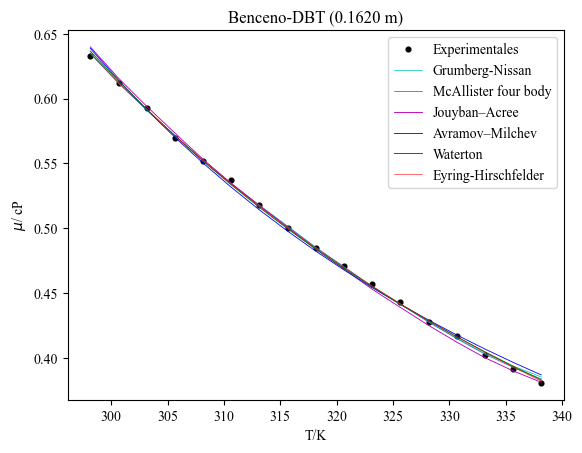

({'PAR_GN': array([0.99690921, 0.01700978]),
  'PAR_JA': array([ 716.04150327, -938.69293112,  373.5912976 ]),
  'PAR_MC': array([-8.66725231e-01,  2.41034146e+01, -1.68137920e+01,  3.52159475e+00,
          6.05750659e+00, -1.56529666e-02]),
  'PAR_AVM': array([1.19730530e-01, 2.66416571e+02, 2.83034153e+00]),
  'PAR_WT': array([2.18050450e-02, 3.18278364e+02, 9.44514051e+01]),
  'PAR_EH': array([1.28083593e+03, 2.69643117e+02, 5.00000000e-01])},
       T[K]  visc_exp   visc_GN   visc_JA   visc_MC  visc_AVM   visc_WT  \
 0   298.15    0.6328  0.635307  0.639983  0.634822  0.638901  0.636717   
 1   300.65    0.6119  0.612115  0.615875  0.611994  0.614396  0.613675   
 2   303.15    0.5927  0.591223  0.594143  0.591351  0.591555  0.591925   
 3   305.65    0.5699  0.571388  0.573529  0.571702  0.570235  0.571374   
 4   308.15    0.5523  0.551784  0.553201  0.552251  0.550306  0.551939   
 5   310.65    0.5374  0.533956  0.534704  0.534490  0.531652  0.533541   
 6   313.15    0.5177  

In [9]:
def GNissanC1(v_0):
    #Benceno-DBT
    T=MIX_C1B["T"].to_numpy(dtype=float)
    mix_exp=MIX_C1B["visc"].to_numpy(dtype=float)
    x1=0.0125 #DBT
    x2=1-x1
    mu1=DBT_VPURE["Viscosity (Liquid vs. Gas ) (N-sec/sqm)"].to_numpy(dtype=float)
    mu2=S_PURAB["visc"].to_numpy(dtype=float)
    G1 = v_0[0] ; G2 = v_0[1]
    G12 = G1 + G2 * T
    mix_teo=np.exp(x1*np.log(mu1)+x2*np.log(mu2)+x1*x2*G12)
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
#. Jouyban–Acree Viscosity Mode
def J_AcreeC1(v_0):
    #Benceno-DBT
    T=MIX_C1B["T"].to_numpy(dtype=float)
    mix_exp=MIX_C1B["visc"].to_numpy(dtype=float)
    x1=0.0125 #DBT
    x2=1-x1
    mu1=DBT_VPURE["Viscosity (Liquid vs. Gas ) (N-sec/sqm)"].to_numpy(dtype=float)
    mu2=S_PURAB["visc"].to_numpy(dtype=float)
    A0 = v_0[0] ; A1 = v_0[1]; A2 = v_0[2]
    l1=np.log(mu1) ; l2=np.log(mu2)
    mix_teo=np.exp(x1*l1+x2*l2+A0*(x1*x2/T)+A1*((x1*x2*(x1-x2))/T)+A2*((x1*x2*(x1-x2)**2)/T))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f    
#Mcallister 4
def MC4BC1(v_0):
    M1=184.26 ; M2=78.11
    T=MIX_C1B["T"].to_numpy(dtype=float)
    mix_exp=MIX_C1B["visc"].to_numpy(dtype=float)
    x1=0.0125 #DBT
    x2=1-x1
    mu1=DBT_VPURE["Viscosity (Liquid vs. Gas ) (N-sec/sqm)"].to_numpy(dtype=float)
    mu2=S_PURAB["visc"].to_numpy(dtype=float)
    K1=v_0[0] ; K2=v_0[1] ; K3=v_0[2]; K4=v_0[3]; K5=v_0[4]; K6=v_0[5]
    n1=K1+K2*T #n1112
    n2=K3+K4*T #n1122
    n3=K5+K6*T #n2221
    RM=M2/M1
    mix_teo=np.exp(x1**4*np.log(mu1)+4*x1**3*x2*np.log(n1)+6*x1**2*x2**2*np.log(n2)+4*x1*x2**3*np.log(n3)+
                  x2**4*np.log(mu2)-np.log(x1+x2*RM)+4*x1**3*x2*np.log((3+RM)/4)+6*x1**2*x2**2*np.log((1+RM)/2)+
                  4*x1*x2**3*np.log((1+3*RM)/4)+x2**4*np.log(RM))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f

#Avramov–Milchev (AM)
def AM(v_0):
    #Ciclohexano-DBT
    #298.15 K de temperatura
    T=MIX_C1B["T"].to_numpy(dtype=float)
    mix_exp=MIX_C1B["visc"].to_numpy()
    n=v_0[0] ;tao=v_0[1]; alpha=v_0[2]
    mix_teo=n*(10**((tao/T)**alpha))
    #10**(np.log10(n)+((tao/T)**alpha))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
#Waterton
def CM(v_0):
    #Ciclohexano-DBT
    #298.15 K de temperatura
    T=MIX_C1B["T"].to_numpy(dtype=float)
    mix_exp=MIX_C1B["visc"].to_numpy()
    n=v_0[0] ;k=v_0[1]; c=v_0[2]
    mix_teo=n*(10**((k*np.exp(c/T))/T))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
#Eyring-Hirschfelder
def EH(v_0):
    #Ciclohexano-DBT
    #298.15 K de temperatura
    T=MIX_C1B["T"].to_numpy(dtype=float)
    mix_exp=MIX_C1B["visc"].to_numpy()
    ER=v_0[0] ;TA=v_0[1]
    mix_teo=np.exp(ER*((1/T)-(1/TA)))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
def GModel_2(v_0,v_2,v_3,v_6):
    mix_exp=MIX_C1B["visc"].to_numpy()
    T=MIX_C1B["T"].to_numpy(dtype=float)
    #Parámetros G-Nissan
    x1=0.0125 #DBT
    x2=1-x1
    mu1=DBT_VPURE["Viscosity (Liquid vs. Gas ) (N-sec/sqm)"].to_numpy(dtype=float)
    mu2=S_PURAB["visc"].to_numpy(dtype=float)
    G1=minimize(GNissanC1,v_2,method="CG").x[0]
    G2=minimize(GNissanC1,v_2,method="CG").x[1]
    G12 = G1 + G2 * T    
    #Parámetros Jouyban–Acree
    A0 = minimize(J_AcreeC1,v_3,method="Nelder-Mead").x[0] 
    A1 = minimize(J_AcreeC1,v_3,method="Nelder-Mead").x[1]
    A2 = minimize(J_AcreeC1,v_3,method="Nelder-Mead").x[2]
    l1=np.log(mu1) ; l2=np.log(mu2)
    #Parámetros MC4
    M1=184.26 ; M2=78.11
    K1=minimize(MC4BC1,v_6,method="TNC").x[0]  ; K2=minimize(MC4BC1,v_6,method="TNC").x[1] 
    K3=minimize(MC4BC1,v_6,method="TNC").x[2]; K4=minimize(MC4BC1,v_6,method="TNC").x[3]
    K5=minimize(MC4BC1,v_6,method="TNC").x[4]; K6=minimize(MC4BC1,v_6,method="TNC").x[5]
    n1=K1+K2*T #n1112
    n2=K3+K4*T #n1122
    n3=K5+K6*T #n2221
    RM=M2/M1        
    #Parámetros AM
    n=minimize(AM,v_0,method="CG").x[0]
    tao=minimize(AM,v_0,method="CG").x[1]
    alpha=minimize(AM,v_0,method="CG").x[2]
    #Parámetros Waterton
    nC=minimize(CM,v_0,method="CG").x[0]
    k=minimize(CM,v_0,method="CG").x[1]
    c=minimize(CM,v_0,method="CG").x[2]    
    #Parámetros Eyring-Hirschfelder
    ER=minimize(EH,v_0).x[0]; TA=minimize(EH,v_0).x[1]
    mix_teoGN=np.exp(x1*np.log(mu1)+x2*np.log(mu2)+x1*x2*G12)
    mix_teoJA=np.exp(x1*l1+x2*l2+A0*(x1*x2/T)+A1*((x1*x2*(x1-x2))/T)+A2*((x1*x2*(x1-x2)**2)/T))   
    mix_teoMC=np.exp(x1**4*np.log(mu1)+4*x1**3*x2*np.log(n1)+6*x1**2*x2**2*np.log(n2)+4*x1*x2**3*np.log(n3)+
                  x2**4*np.log(mu2)-np.log(x1+x2*RM)+4*x1**3*x2*np.log((3+RM)/4)+6*x1**2*x2**2*np.log((1+RM)/2)+
                  4*x1*x2**3*np.log((1+3*RM)/4)+x2**4*np.log(RM))                
    mix_teoAM=n*(10**((tao/T)**alpha))
    mix_teoCM=nC*(10**((k*np.exp(c/T))/T))
    mix_teoEH=np.exp(ER*((1/T)-(1/TA)))
    plt.rcParams["font.family"] = "Times New Roman"
    plt.plot(T,mix_exp,"ko",markersize=3.4,label="Experimentales")
    plt.plot(T,mix_teoGN,"c-",label="Grumberg-Nissan",linewidth=0.5)        
    plt.plot(T,mix_teoMC,"-",label="McAllister four body",linewidth=0.55)        
    plt.plot(T,mix_teoJA,"m-",label="Jouyban–Acree",linewidth=0.65)                
    plt.plot(T,mix_teoAM,"b-",label="Avramov–Milchev",linewidth=0.6)
    plt.plot(T,mix_teoCM,"g-",label="Waterton",linewidth=0.7)
    plt.plot(T,mix_teoEH,"r-",label="Eyring-Hirschfelder",linewidth=0.4)
    plt.title("Benceno-DBT (0.1620 m)")
    plt.legend(loc="best")
    plt.xlabel("T/K")
    plt.ylabel("$\mu$/ cP")
    plt.savefig("Modelo_B_DBTC1.svg")
    plt.show()
    df_visc=pd.DataFrame({"T[K]":T,"visc_exp":mix_exp,"visc_GN":mix_teoGN,"visc_JA":mix_teoJA,"visc_MC":mix_teoMC,"visc_AVM":mix_teoAM,"visc_WT":mix_teoCM,"visc_EH":mix_teoEH,
                         "SSRES_GN":minimize(GNissanC1,v_2,method="CG").fun,"SSRES_JA":minimize(J_AcreeC1,v_3,method="Nelder-mead").fun,"SSRES_MC":minimize(MC4BC1,v_6,method="TNC").fun,
                          "SSRES_AVM":minimize(AM,v_0,method="CG").fun,"SSRES_WT":minimize(CM,v_0,method="CG").fun,"SSRES_EH":minimize(EH,v_0).fun})
    df_params={"PAR_GN":minimize(GNissanC1,v_2,method="CG").x,"PAR_JA":minimize(J_AcreeC1,v_3,method="Nelder-mead").x,"PAR_MC":minimize(MC4BC1,v_6,method="TNC").x,
                          "PAR_AVM":minimize(AM,v_0,method="CG").x,"PAR_WT":minimize(CM,v_0,method="CG").x,"PAR_EH":minimize(EH,v_0).x}    
    return df_params,df_visc                            
MM_2=GModel_2([0.1,0.2,0.5],[1,1],[1,1,1],[-8.66725233e-01,  2.41034251e+01, -1.68137883e+01,  3.52159446e+00,
        6.05748701e+00, -1.55973884e-02])
MM_2

## Octano-DBT 0.1108 m

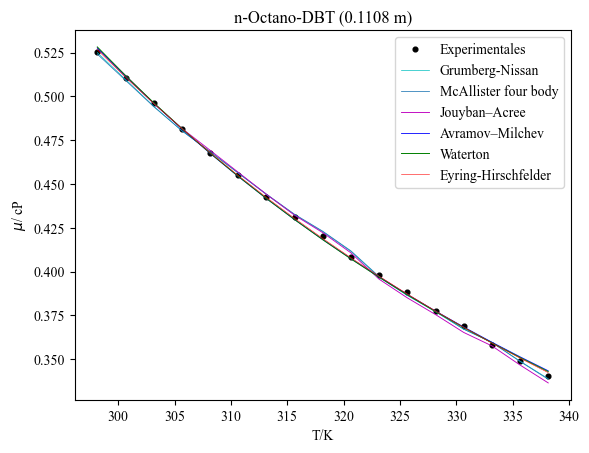

({'PAR_GN': array([0.72225391, 0.01139749]),
  'PAR_JA': array([ 475.97852145, -458.57565142,  451.20947019]),
  'PAR_MC': array([-4.24861649e+00,  3.61597336e-02,  3.59924347e+02, -9.04088889e-01,
          2.93515879e+00, -7.37270684e-03]),
  'PAR_AVM': array([5.00915766e-02, 3.02350079e+02, 1.59975187e+00]),
  'PAR_WT': array([3.27024015e-02, 2.50860736e+02, 1.07895563e+02]),
  'PAR_EH': array([1.08528684e+03, 2.53494802e+02, 5.00000000e-01])},
       T[K]  visc_exp   visc_GN   visc_JA   visc_MC  visc_AVM   visc_WT  \
 0   298.15    0.5256  0.524999  0.527690  0.524141  0.527710  0.528255   
 1   300.65    0.5103  0.509755  0.511950  0.509213  0.511477  0.511913   
 2   303.15    0.4965  0.494437  0.496164  0.494187  0.496074  0.496413   
 3   305.65    0.4813  0.480458  0.481749  0.480425  0.481448  0.481699   
 4   308.15    0.4679  0.468419  0.469306  0.468509  0.467547  0.467719   
 5   310.65    0.4551  0.456200  0.456704  0.456400  0.454325  0.454424   
 6   313.15    0.4428  

In [10]:
def GNissanC1(v_0):
    #Octano-DBT
    T=MIX_C1O["T"].to_numpy(dtype=float)
    mix_exp=MIX_C1O["visc"].to_numpy(dtype=float)
    x1=0.0125 #DBT
    x2=1-x1
    mu1=DBT_VPURE["Viscosity (Liquid vs. Gas ) (N-sec/sqm)"].to_numpy(dtype=float)
    mu2=S_PURAO["visc"].to_numpy(dtype=float)
    G1 = v_0[0] ; G2 = v_0[1]
    G12 = G1 + G2 * T
    mix_teo=np.exp(x1*np.log(mu1)+x2*np.log(mu2)+x1*x2*G12)
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
#. Jouyban–Acree Viscosity Mode
def J_AcreeC1(v_0):
    #Octano-DBT
    T=MIX_C1O["T"].to_numpy(dtype=float)
    mix_exp=MIX_C1O["visc"].to_numpy(dtype=float)
    x1=0.0125 #DBT
    x2=1-x1
    mu1=DBT_VPURE["Viscosity (Liquid vs. Gas ) (N-sec/sqm)"].to_numpy(dtype=float)
    mu2=S_PURAO["visc"].to_numpy(dtype=float)
    A0 = v_0[0] ; A1 = v_0[1]; A2 = v_0[2]
    l1=np.log(mu1) ; l2=np.log(mu2)
    mix_teo=np.exp(x1*l1+x2*l2+A0*(x1*x2/T)+A1*((x1*x2*(x1-x2))/T)+A2*((x1*x2*(x1-x2)**2)/T))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f    
#Mcallister 4
def MC4BC1(v_0):
    M1=184.26 ; M2=114.23 
    T=MIX_C1O["T"].to_numpy(dtype=float)
    mix_exp=MIX_C1O["visc"].to_numpy(dtype=float)
    x1=0.0125 #DBT
    x2=1-x1
    mu1=DBT_VPURE["Viscosity (Liquid vs. Gas ) (N-sec/sqm)"].to_numpy(dtype=float)
    mu2=S_PURAO["visc"].to_numpy(dtype=float)
    K1=v_0[0] ; K2=v_0[1] ; K3=v_0[2]; K4=v_0[3]; K5=v_0[4]; K6=v_0[5]
    n1=K1+K2*T #n1112
    n2=K3+K4*T #n1122
    n3=K5+K6*T #n2221
    RM=M2/M1
    mix_teo=np.exp(x1**4*np.log(mu1)+4*x1**3*x2*np.log(n1)+6*x1**2*x2**2*np.log(n2)+4*x1*x2**3*np.log(n3)+
                  x2**4*np.log(mu2)-np.log(x1+x2*RM)+4*x1**3*x2*np.log((3+RM)/4)+6*x1**2*x2**2*np.log((1+RM)/2)+
                  4*x1*x2**3*np.log((1+3*RM)/4)+x2**4*np.log(RM))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f

#Avramov–Milchev (AM)
def AM(v_0):
    #Ciclohexano-DBT
    #298.15 K de temperatura
    T=MIX_C1O["T"].to_numpy(dtype=float)
    mix_exp=MIX_C1O["visc"].to_numpy()
    n=v_0[0] ;tao=v_0[1]; alpha=v_0[2]
    mix_teo=n*(10**((tao/T)**alpha))
    #10**(np.log10(n)+((tao/T)**alpha))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
#Waterton
def CM(v_0):
    #Ciclohexano-DBT
    #298.15 K de temperatura
    T=MIX_C1O["T"].to_numpy(dtype=float)
    mix_exp=MIX_C1O["visc"].to_numpy()
    n=v_0[0] ;k=v_0[1]; c=v_0[2]
    mix_teo=n*(10**((k*np.exp(c/T))/T))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
#Eyring-Hirschfelder
def EH(v_0):
    #Ciclohexano-DBT
    #298.15 K de temperatura
    T=MIX_C1O["T"].to_numpy(dtype=float)
    mix_exp=MIX_C1O["visc"].to_numpy()
    ER=v_0[0] ;TA=v_0[1]
    mix_teo=np.exp(ER*((1/T)-(1/TA)))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
def GModel_3(v_0,v_2,v_3,v_6):
    mix_exp=MIX_C1O["visc"].to_numpy()
    T=MIX_C1O["T"].to_numpy(dtype=float)
    #Parámetros G-Nissan
    x1=0.0125 #DBT
    x2=1-x1
    mu1=DBT_VPURE["Viscosity (Liquid vs. Gas ) (N-sec/sqm)"].to_numpy(dtype=float)
    mu2=S_PURAO["visc"].to_numpy(dtype=float)
    G1=minimize(GNissanC1,v_2,method="Nelder-Mead").x[0]
    G2=minimize(GNissanC1,v_2,method="Nelder-Mead").x[1]
    G12 = G1 + G2 * T    
    #Parámetros Jouyban–Acree
    A0 = minimize(J_AcreeC1,v_3,method="COBYLA").x[0] 
    A1 = minimize(J_AcreeC1,v_3,method="COBYLA").x[1]
    A2 = minimize(J_AcreeC1,v_3,method="COBYLA").x[2]
    l1=np.log(mu1) ; l2=np.log(mu2)
    #Parámetros MC4
    M1=184.26 ; M2=114.23
    K1=minimize(MC4BC1,v_6,method="TNC").x[0]  ; K2=minimize(MC4BC1,v_6,method="TNC").x[1] 
    K3=minimize(MC4BC1,v_6,method="TNC").x[2]; K4=minimize(MC4BC1,v_6,method="TNC").x[3]
    K5=minimize(MC4BC1,v_6,method="TNC").x[4]; K6=minimize(MC4BC1,v_6,method="TNC").x[5]
    n1=K1+K2*T #n1112
    n2=K3+K4*T #n1122
    n3=K5+K6*T #n2221
    RM=M2/M1            
    #Parámetros AM
    n=minimize(AM,v_0,method="CG").x[0]
    tao=minimize(AM,v_0,method="CG").x[1]
    alpha=minimize(AM,v_0,method="CG").x[2]
    #Parámetros Waterton
    nC=minimize(CM,v_0,method="CG").x[0]
    k=minimize(CM,v_0,method="CG").x[1]
    c=minimize(CM,v_0,method="CG").x[2]    
    #Parámetros Eyring-Hirschfelder
    ER=minimize(EH,v_0).x[0]; TA=minimize(EH,v_0).x[1]
    mix_teoGN=np.exp(x1*np.log(mu1)+x2*np.log(mu2)+x1*x2*G12)
    mix_teoJA=np.exp(x1*l1+x2*l2+A0*(x1*x2/T)+A1*((x1*x2*(x1-x2))/T)+A2*((x1*x2*(x1-x2)**2)/T))   
    mix_teoMC=np.exp(x1**4*np.log(mu1)+4*x1**3*x2*np.log(n1)+6*x1**2*x2**2*np.log(n2)+4*x1*x2**3*np.log(n3)+
                  x2**4*np.log(mu2)-np.log(x1+x2*RM)+4*x1**3*x2*np.log((3+RM)/4)+6*x1**2*x2**2*np.log((1+RM)/2)+
                  4*x1*x2**3*np.log((1+3*RM)/4)+x2**4*np.log(RM))                    
    mix_teoAM=n*(10**((tao/T)**alpha))
    mix_teoCM=nC*(10**((k*np.exp(c/T))/T))
    mix_teoEH=np.exp(ER*((1/T)-(1/TA)))
    plt.rcParams["font.family"] = "Times New Roman"
    plt.plot(T,mix_exp,"ko",markersize=3.4,label="Experimentales")    
    plt.plot(T,mix_teoGN,"c-",label="Grumberg-Nissan",linewidth=0.5)        
    plt.plot(T,mix_teoMC,"-",label="McAllister four body",linewidth=0.55)        
    plt.plot(T,mix_teoJA,"m-",label="Jouyban–Acree",linewidth=0.65)             
    plt.plot(T,mix_teoAM,"b-",label="Avramov–Milchev",linewidth=0.6)
    plt.plot(T,mix_teoCM,"g-",label="Waterton",linewidth=0.7)
    plt.plot(T,mix_teoEH,"r-",label="Eyring-Hirschfelder",linewidth=0.4)
    plt.title("n-Octano-DBT (0.1108 m)")
    plt.legend(loc="best")
    plt.xlabel("T/K")
    plt.ylabel("$\mu$/ cP")
    plt.savefig("Modelo_O_DBTC1.svg")
    plt.show()
    df_visc=pd.DataFrame({"T[K]":T,"visc_exp":mix_exp,"visc_GN":mix_teoGN,"visc_JA":mix_teoJA,"visc_MC":mix_teoMC,"visc_AVM":mix_teoAM,"visc_WT":mix_teoCM,"visc_EH":mix_teoEH,
                         "SSRES_GN":minimize(GNissanC1,v_2,method="Nelder-Mead").fun,"SSRES_JA":minimize(J_AcreeC1,v_3,method="COBYLA").fun,"SSRES_MC":minimize(MC4BC1,v_6,method="TNC").fun,
                          "SSRES_AVM":minimize(AM,v_0,method="CG").fun,"SSRES_WT":minimize(CM,v_0,method="CG").fun,"SSRES_EH":minimize(EH,v_0).fun})
    df_params={"PAR_GN":minimize(GNissanC1,v_2,method="Nelder-Mead").x,"PAR_JA":minimize(J_AcreeC1,v_3,method="COBYLA").x,"PAR_MC":minimize(MC4BC1,v_6,method="TNC").x,
                          "PAR_AVM":minimize(AM,v_0,method="CG").x,"PAR_WT":minimize(CM,v_0,method="CG").x,"PAR_EH":minimize(EH,v_0).x}    
    return df_params,df_visc                            
MM_3=GModel_3([0.001,20,0.5],[900,20],[1,1,1],[-4.24861659e+00,  3.61592764e-02,  3.59924332e+02, -9.04089109e-01,
        2.93514060e+00, -7.37264977e-03])
MM_3

## Ciclohexano-DBT 0.2277 m

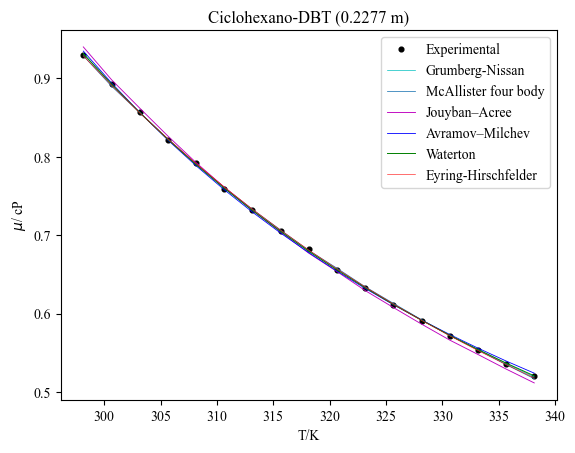

({'PAR_GN': array([0.20706364, 0.01607332]),
  'PAR_JA': array([ 597.68919526, -783.05520159,  311.78105914]),
  'PAR_MC': array([ 1.54040246e+01,  7.79649371e+02,  3.26784950e+02,  3.56526901e+01,
          5.35938025e+00, -1.39617988e-02]),
  'PAR_AVM': array([1.14271985e-01, 2.87696604e+02, 2.55597888e+00]),
  'PAR_WT': array([2.51405441e-02, 3.07520393e+02, 1.25043296e+02]),
  'PAR_EH': array([1.47044981e+03, 2.93751155e+02, 5.00000000e-01])},
       T[K]  visc_exp   visc_GN   visc_JA   visc_MC  visc_AVM   visc_WT  \
 0   298.15    0.9304  0.931521  0.940179  0.928934  0.934875  0.931587   
 1   300.65    0.8924  0.891562  0.898423  0.890158  0.894289  0.892815   
 2   303.15    0.8567  0.856979  0.862218  0.856379  0.856573  0.856468   
 3   305.65    0.8215  0.822863  0.826605  0.822978  0.821469  0.822354   
 4   308.15    0.7917  0.790334  0.792703  0.791016  0.788750  0.790300   
 5   310.65    0.7592  0.760203  0.761315  0.761268  0.758210  0.760149   
 6   313.15    0.7329  

In [11]:
def GNissanC1(v_0):
    #Ciclohexano-DBT
    T=MIX_C2CH["T"].to_numpy(dtype=float)
    mix_exp=MIX_C2CH["visc"].to_numpy(dtype=float)
    x1=0.0188 #DBT
    x2=1-x1
    mu1=DBT_VPURE["Viscosity (Liquid vs. Gas ) (N-sec/sqm)"].to_numpy(dtype=float)
    mu2=S_PURACH["visc"].to_numpy(dtype=float)
    G1 = v_0[0] ; G2 = v_0[1]
    G12 = G1 + G2 * T
    mix_teo=np.exp(x1*np.log(mu1)+x2*np.log(mu2)+x1*x2*G12)
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
#. Jouyban–Acree Viscosity Mode
def J_AcreeC1(v_0):
    #Ciclohexano-DBT
    T=MIX_C2CH["T"].to_numpy(dtype=float)
    mix_exp=MIX_C2CH["visc"].to_numpy(dtype=float)
    x1=0.0188 #DBT
    x2=1-x1
    mu1=DBT_VPURE["Viscosity (Liquid vs. Gas ) (N-sec/sqm)"].to_numpy(dtype=float)
    mu2=S_PURACH["visc"].to_numpy(dtype=float)
    A0 = v_0[0] ; A1 = v_0[1]; A2 = v_0[2]
    l1=np.log(mu1) ; l2=np.log(mu2)
    mix_teo=np.exp(x1*l1+x2*l2+A0*(x1*x2/T)+A1*((x1*x2*(x1-x2))/T)+A2*((x1*x2*(x1-x2)**2)/T))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f    
#Mcallister 4
def MC4BC1(v_0):
    M1=184.26 ; M2=84.16 
    T=MIX_C2CH["T"].to_numpy(dtype=float)
    mix_exp=MIX_C2CH["visc"].to_numpy(dtype=float)
    x1=0.0188 #DBT
    x2=1-x1
    mu1=DBT_VPURE["Viscosity (Liquid vs. Gas ) (N-sec/sqm)"].to_numpy(dtype=float)
    mu2=S_PURACH["visc"].to_numpy(dtype=float)
    K1=v_0[0] ; K2=v_0[1] ; K3=v_0[2]; K4=v_0[3]; K5=v_0[4]; K6=v_0[5]
    n1=K1+K2*T #n1112
    n2=K3+K4*T #n1122
    n3=K5+K6*T #n2221
    RM=M2/M1
    mix_teo=np.exp(x1**4*np.log(mu1)+4*x1**3*x2*np.log(n1)+6*x1**2*x2**2*np.log(n2)+4*x1*x2**3*np.log(n3)+
                  x2**4*np.log(mu2)-np.log(x1+x2*RM)+4*x1**3*x2*np.log((3+RM)/4)+6*x1**2*x2**2*np.log((1+RM)/2)+
                  4*x1*x2**3*np.log((1+3*RM)/4)+x2**4*np.log(RM))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
#Avramov–Milchev (AM)
def AM(v_0):
    #Ciclohexano-DBT
    #298.15 K de temperatura
    T=MIX_C2CH["T"].to_numpy(dtype=float)
    mix_exp=MIX_C2CH["visc"].to_numpy()
    n=v_0[0] ;tao=v_0[1]; alpha=v_0[2]
    mix_teo=n*(10**((tao/T)**alpha))
    #10**(np.log10(n)+((tao/T)**alpha))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
#Waterton
def CM(v_0):
    #Ciclohexano-DBT
    #298.15 K de temperatura
    T=MIX_C2CH["T"].to_numpy(dtype=float)
    mix_exp=MIX_C2CH["visc"].to_numpy()
    n=v_0[0] ;k=v_0[1]; c=v_0[2]
    mix_teo=n*(10**((k*np.exp(c/T))/T))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
#Eyring-Hirschfelder
def EH(v_0):
    #Ciclohexano-DBT
    #298.15 K de temperatura
    T=MIX_C2CH["T"].to_numpy(dtype=float)
    mix_exp=MIX_C2CH["visc"].to_numpy()
    ER=v_0[0] ;TA=v_0[1]
    mix_teo=np.exp(ER*((1/T)-(1/TA)))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
def GModel_4(v_0,v_2,v_3,v_6):
    mix_exp=MIX_C2CH["visc"].to_numpy()
    T=MIX_C2CH["T"].to_numpy(dtype=float)
    #Parámetros G-Nissan
    x1=0.0188 #DBT
    x2=1-x1
    mu1=DBT_VPURE["Viscosity (Liquid vs. Gas ) (N-sec/sqm)"].to_numpy(dtype=float)
    mu2=S_PURACH["visc"].to_numpy(dtype=float)
    G1=minimize(GNissanC1,v_2,method="Nelder-Mead").x[0]
    G2=minimize(GNissanC1,v_2,method="Nelder-Mead").x[1]
    G12 = G1 + G2 * T    
    #Parámetros Jouyban–Acree
    A0 = minimize(J_AcreeC1,v_3,method="Nelder-Mead").x[0] 
    A1 = minimize(J_AcreeC1,v_3,method="Nelder-Mead").x[1]
    A2 = minimize(J_AcreeC1,v_3,method="Nelder-Mead").x[2]
    l1=np.log(mu1) ; l2=np.log(mu2)
    #Parámetros MC4
    M1=184.26 ; M2=84.16 
    K1=minimize(MC4BC1,v_6,method="Nelder-Mead").x[0]  ; K2=minimize(MC4BC1,v_6,method="Nelder-Mead").x[1] 
    K3=minimize(MC4BC1,v_6,method="Nelder-Mead").x[2]; K4=minimize(MC4BC1,v_6,method="Nelder-Mead").x[3]
    K5=minimize(MC4BC1,v_6,method="Nelder-Mead").x[4]; K6=minimize(MC4BC1,v_6,method="Nelder-Mead").x[5]
    n1=K1+K2*T #n1112
    n2=K3+K4*T #n1122
    n3=K5+K6*T #n2221
    RM=M2/M1
    #Parámetros AM
    n=minimize(AM,v_0,method="CG").x[0]
    tao=minimize(AM,v_0,method="CG").x[1]
    alpha=minimize(AM,v_0,method="CG").x[2]
    #Parámetros Waterton
    nC=minimize(CM,v_0,method="CG").x[0]
    k=minimize(CM,v_0,method="CG").x[1]
    c=minimize(CM,v_0,method="CG").x[2]    
    #Parámetros Eyring-Hirschfelder
    ER=minimize(EH,v_0).x[0]; TA=minimize(EH,v_0).x[1]
    mix_teoGN=np.exp(x1*np.log(mu1)+x2*np.log(mu2)+x1*x2*G12)
    mix_teoJA=np.exp(x1*l1+x2*l2+A0*(x1*x2/T)+A1*((x1*x2*(x1-x2))/T)+A2*((x1*x2*(x1-x2)**2)/T))   
    mix_teoMC=np.exp(x1**4*np.log(mu1)+4*x1**3*x2*np.log(n1)+6*x1**2*x2**2*np.log(n2)+4*x1*x2**3*np.log(n3)+
                  x2**4*np.log(mu2)-np.log(x1+x2*RM)+4*x1**3*x2*np.log((3+RM)/4)+6*x1**2*x2**2*np.log((1+RM)/2)+
                  4*x1*x2**3*np.log((1+3*RM)/4)+x2**4*np.log(RM))        
    mix_teoAM=n*(10**((tao/T)**alpha))
    mix_teoCM=nC*(10**((k*np.exp(c/T))/T))
    mix_teoEH=np.exp(ER*((1/T)-(1/TA)))
    plt.rcParams["font.family"] = "Times New Roman"
    plt.plot(T,mix_exp,"ko",markersize=3.4,label="Experimental")
    plt.plot(T,mix_teoGN,"c-",label="Grumberg-Nissan",linewidth=0.5)        
    plt.plot(T,mix_teoMC,"-",label="McAllister four body",linewidth=0.55)        
    plt.plot(T,mix_teoJA,"m-",label="Jouyban–Acree",linewidth=0.65)        
    plt.plot(T,mix_teoAM,"b-",label="Avramov–Milchev",linewidth=0.6)
    plt.plot(T,mix_teoCM,"g-",label="Waterton",linewidth=0.7)
    plt.plot(T,mix_teoEH,"r-",label="Eyring-Hirschfelder",linewidth=0.4)
    plt.title("Ciclohexano-DBT (0.2277 m)")
    plt.legend(loc="best")
    plt.xlabel("T/K")
    plt.ylabel("$\mu$/ cP")
    plt.savefig("Modelo_CHDBTC2.svg")
    plt.show()
    df_visc=pd.DataFrame({"T[K]":T,"visc_exp":mix_exp,"visc_GN":mix_teoGN,"visc_JA":mix_teoJA,"visc_MC":mix_teoMC,"visc_AVM":mix_teoAM,"visc_WT":mix_teoCM,"visc_EH":mix_teoEH,
                         "SSRES_GN":minimize(GNissanC1,v_2,method="Nelder-Mead").fun,"SSRES_JA":minimize(J_AcreeC1,v_3,method="Nelder-Mead").fun,"SSRES_MC":minimize(MC4BC1,v_6,method="Nelder-Mead").fun,
                          "SSRES_AVM":minimize(AM,v_0,method="CG").fun,"SSRES_WT":minimize(CM,v_0,method="CG").fun,"SSRES_EH":minimize(EH,v_0).fun})
    df_params={"PAR_GN":minimize(GNissanC1,v_2,method="Nelder-Mead").x,"PAR_JA":minimize(J_AcreeC1,v_3,method="Nelder-Mead").x,"PAR_MC":minimize(MC4BC1,v_6,method="Nelder-Mead").x,
                          "PAR_AVM":minimize(AM,v_0,method="CG").x,"PAR_WT":minimize(CM,v_0,method="CG").x,"PAR_EH":minimize(EH,v_0).x}    
    return df_params,df_visc                            
MM_4=GModel_4([0.001,0.1,0.5],[0.2,0.5],[1,1,1],[-8.66725233e-01,  2.41034251e+01, -1.68137883e+01,  3.52159446e+00,
        6.05748701e+00, -1.55973884e-02])
MM_4

## Tolueno-DBT 0.2080 m

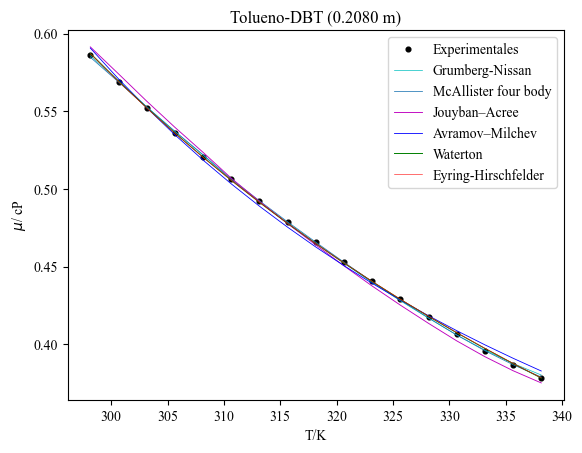

({'PAR_GN': array([0.99505777, 0.01424213]),
  'PAR_JA': array([ 625.52402346, -819.93965399,  326.52663476]),
  'PAR_MC': array([-1.23231010e+00,  4.71191908e+01, -1.49068943e+01,  2.88351466e+00,
          3.91344503e+00, -9.91558151e-03]),
  'PAR_AVM': array([1.51153425e-01, 2.50986171e+02, 3.04452692e+00]),
  'PAR_WT': array([1.47596249e-02, 4.71431535e+02, 3.49744571e+00]),
  'PAR_EH': array([1.1071983e+03, 2.6075258e+02, 5.0000000e-01])},
       T[K]  visc_exp   visc_GN   visc_JA   visc_MC  visc_AVM   visc_WT  \
 0   298.15    0.5863  0.585868  0.591490  0.584823  0.590757  0.587384   
 1   300.65    0.5689  0.569555  0.574136  0.568916  0.570885  0.569461   
 2   303.15    0.5524  0.552973  0.556571  0.552714  0.552307  0.552370   
 3   305.65    0.5361  0.537050  0.539727  0.537097  0.534913  0.536063   
 4   308.15    0.5209  0.521783  0.523600  0.522064  0.518607  0.520493   
 5   310.65    0.5063  0.505929  0.506938  0.506444  0.503301  0.505618   
 6   313.15    0.4923  0.4

In [12]:
def GNissanC1(v_0):
    #Tolueno-DBT
    T=MIX_C2T["T"].to_numpy(dtype=float)
    mix_exp=MIX_C2T["visc"].to_numpy(dtype=float)
    x1=0.0188 #DBT
    x2=1-x1
    mu1=DBT_VPURE["Viscosity (Liquid vs. Gas ) (N-sec/sqm)"].to_numpy(dtype=float)
    mu2=S_PURAT["visc"].to_numpy(dtype=float)
    G1 = v_0[0] ; G2 = v_0[1]
    G12 = G1 + G2 * T
    mix_teo=np.exp(x1*np.log(mu1)+x2*np.log(mu2)+x1*x2*G12)
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
#. Jouyban–Acree Viscosity Mode
def J_AcreeC1(v_0):
    #Tolueno-DBT
    T=MIX_C2T["T"].to_numpy(dtype=float)
    mix_exp=MIX_C2T["visc"].to_numpy(dtype=float)
    x1=0.0188 #DBT
    x2=1-x1
    mu1=DBT_VPURE["Viscosity (Liquid vs. Gas ) (N-sec/sqm)"].to_numpy(dtype=float)
    mu2=S_PURAT["visc"].to_numpy(dtype=float)
    A0 = v_0[0] ; A1 = v_0[1]; A2 = v_0[2]
    l1=np.log(mu1) ; l2=np.log(mu2)
    mix_teo=np.exp(x1*l1+x2*l2+A0*(x1*x2/T)+A1*((x1*x2*(x1-x2))/T)+A2*((x1*x2*(x1-x2)**2)/T))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f    
#Mcallister 4
def MC4BC1(v_0):
    M1=184.26 ; M2=92.14
    T=MIX_C2T["T"].to_numpy(dtype=float)
    mix_exp=MIX_C2T["visc"].to_numpy(dtype=float)
    x1=0.0188 #DBT
    x2=1-x1
    mu1=DBT_VPURE["Viscosity (Liquid vs. Gas ) (N-sec/sqm)"].to_numpy(dtype=float)
    mu2=S_PURAT["visc"].to_numpy(dtype=float)
    K1=v_0[0] ; K2=v_0[1] ; K3=v_0[2]; K4=v_0[3]; K5=v_0[4]; K6=v_0[5]
    n1=K1+K2*T #n1112
    n2=K3+K4*T #n1122
    n3=K5+K6*T #n2221
    RM=M2/M1
    mix_teo=np.exp(x1**4*np.log(mu1)+4*x1**3*x2*np.log(n1)+6*x1**2*x2**2*np.log(n2)+4*x1*x2**3*np.log(n3)+
                  x2**4*np.log(mu2)-np.log(x1+x2*RM)+4*x1**3*x2*np.log((3+RM)/4)+6*x1**2*x2**2*np.log((1+RM)/2)+
                  4*x1*x2**3*np.log((1+3*RM)/4)+x2**4*np.log(RM))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
#Avramov–Milchev (AM)
def AM(v_0):
    #Tolueno-DBT
    #298.15 K de temperatura
    T=MIX_C2T["T"].to_numpy(dtype=float)
    mix_exp=MIX_C2T["visc"].to_numpy()
    n=v_0[0] ;tao=v_0[1]; alpha=v_0[2]
    mix_teo=n*(10**((tao/T)**alpha))
    #10**(np.log10(n)+((tao/T)**alpha))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
#Waterton
def CM(v_0):
    #Ciclohexano-DBT
    #298.15 K de temperatura
    T=MIX_C2T["T"].to_numpy(dtype=float)
    mix_exp=MIX_C2T["visc"].to_numpy()
    n=v_0[0] ;k=v_0[1]; c=v_0[2]
    mix_teo=n*(10**((k*np.exp(c/T))/T))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
#Eyring-Hirschfelder
def EH(v_0):
    #Ciclohexano-DBT
    #298.15 K de temperatura
    T=MIX_C2T["T"].to_numpy(dtype=float)
    mix_exp=MIX_C2T["visc"].to_numpy()
    ER=v_0[0] ;TA=v_0[1]
    mix_teo=np.exp(ER*((1/T)-(1/TA)))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
def GModel_5(v_0,v_2,v_3,v_6):
    mix_exp=MIX_C2T["visc"].to_numpy()
    T=MIX_C2T["T"].to_numpy(dtype=float)
    #Parámetros G-Nissan
    x1=0.0188 #DBT
    x2=1-x1
    mu1=DBT_VPURE["Viscosity (Liquid vs. Gas ) (N-sec/sqm)"].to_numpy(dtype=float)
    mu2=S_PURAT["visc"].to_numpy(dtype=float)
    G1=minimize(GNissanC1,v_2,method="Nelder-Mead").x[0]
    G2=minimize(GNissanC1,v_2,method="Nelder-Mead").x[1]
    G12 = G1 + G2 * T    
    #Parámetros Jouyban–Acree
    A0 = minimize(J_AcreeC1,v_3,method="Nelder-Mead").x[0] 
    A1 = minimize(J_AcreeC1,v_3,method="Nelder-Mead").x[1]
    A2 = minimize(J_AcreeC1,v_3,method="Nelder-Mead").x[2]
    l1=np.log(mu1) ; l2=np.log(mu2)
    #Parámetros MC4
    M1=184.26 ; M2=92.14
    K1=minimize(MC4BC1,v_6,method="Nelder-Mead").x[0]  ; K2=minimize(MC4BC1,v_6,method="Nelder-Mead").x[1] 
    K3=minimize(MC4BC1,v_6,method="Nelder-Mead").x[2]; K4=minimize(MC4BC1,v_6,method="Nelder-Mead").x[3]
    K5=minimize(MC4BC1,v_6,method="Nelder-Mead").x[4]; K6=minimize(MC4BC1,v_6,method="Nelder-Mead").x[5]
    n1=K1+K2*T #n1112
    n2=K3+K4*T #n1122
    n3=K5+K6*T #n2221
    RM=M2/M1    
    #Parámetros AM
    n=minimize(AM,v_0,method="CG").x[0]
    tao=minimize(AM,v_0,method="CG").x[1]
    alpha=minimize(AM,v_0,method="CG").x[2]        
    #Parámetros Waterton
    nC=minimize(CM,v_0,method="CG").x[0]
    k=minimize(CM,v_0,method="CG").x[1]
    c=minimize(CM,v_0,method="CG").x[2]    
    #Parámetros Eyring-Hirschfelder
    ER=minimize(EH,v_0).x[0]; TA=minimize(EH,v_0).x[1]
    mix_teoAM=n*(10**((tao/T)**alpha))
    mix_teoCM=nC*(10**((k*np.exp(c/T))/T))
    mix_teoEH=np.exp(ER*((1/T)-(1/TA)))
    mix_teoGN=np.exp(x1*np.log(mu1)+x2*np.log(mu2)+x1*x2*G12)
    mix_teoJA=np.exp(x1*l1+x2*l2+A0*(x1*x2/T)+A1*((x1*x2*(x1-x2))/T)+A2*((x1*x2*(x1-x2)**2)/T))   
    mix_teoMC=np.exp(x1**4*np.log(mu1)+4*x1**3*x2*np.log(n1)+6*x1**2*x2**2*np.log(n2)+4*x1*x2**3*np.log(n3)+
                  x2**4*np.log(mu2)-np.log(x1+x2*RM)+4*x1**3*x2*np.log((3+RM)/4)+6*x1**2*x2**2*np.log((1+RM)/2)+
                  4*x1*x2**3*np.log((1+3*RM)/4)+x2**4*np.log(RM))            
    plt.rcParams["font.family"] = "Times New Roman"
    plt.plot(T,mix_exp,"ko",markersize=3.4,label="Experimentales")
    plt.plot(T,mix_teoGN,"c-",label="Grumberg-Nissan",linewidth=0.5)        
    plt.plot(T,mix_teoMC,"-",label="McAllister four body",linewidth=0.55)        
    plt.plot(T,mix_teoJA,"m-",label="Jouyban–Acree",linewidth=0.65)            
    plt.plot(T,mix_teoAM,"b-",label="Avramov–Milchev",linewidth=0.6)
    plt.plot(T,mix_teoCM,"g-",label="Waterton",linewidth=0.7)
    plt.plot(T,mix_teoEH,"r-",label="Eyring-Hirschfelder",linewidth=0.4)
    plt.title("Tolueno-DBT (0.2080 m)")
    plt.legend(loc="best")
    plt.xlabel("T/K")
    plt.ylabel("$\mu$/ cP")
    plt.savefig("Modelo_TOLDBTC2.svg")
    plt.show()
    df_visc=pd.DataFrame({"T[K]":T,"visc_exp":mix_exp,"visc_GN":mix_teoGN,"visc_JA":mix_teoJA,"visc_MC":mix_teoMC,"visc_AVM":mix_teoAM,"visc_WT":mix_teoCM,"visc_EH":mix_teoEH,
                         "SSRES_GN":minimize(GNissanC1,v_2,method="Nelder-Mead").fun,"SSRES_JA":minimize(J_AcreeC1,v_3,method="Nelder-Mead").fun,"SSRES_MC":minimize(MC4BC1,v_6,method="Nelder-Mead").fun,
                          "SSRES_AVM":minimize(AM,v_0,method="CG").fun,"SSRES_WT":minimize(CM,v_0,method="CG").fun,"SSRES_EH":minimize(EH,v_0).fun})
    df_params={"PAR_GN":minimize(GNissanC1,v_2,method="Nelder-Mead").x,"PAR_JA":minimize(J_AcreeC1,v_3,method="Nelder-Mead").x,"PAR_MC":minimize(MC4BC1,v_6,method="Nelder-Mead").x,
                          "PAR_AVM":minimize(AM,v_0,method="CG").x,"PAR_WT":minimize(CM,v_0,method="CG").x,"PAR_EH":minimize(EH,v_0).x}    
    return df_params,df_visc                            
MM_5=GModel_5([0.001,0.3,0.5],[0.2,0.2],[1,1,1],[-8.66725233e-01,  2.41034251e+01, -1.68137883e+01,  3.52159446e+00,
        6.05748701e+00, -1.55973884e-02])
MM_5

## Benceno-DBT 0.2452 m

C:\Users\retou\AppData\Local\Temp\ipykernel_19248\987947322.py:48: RuntimeWarning: invalid value encountered in log
  mix_teo=np.exp(x1**4*np.log(mu1)+4*x1**3*x2*np.log(n1)+6*x1**2*x2**2*np.log(n2)+4*x1*x2**3*np.log(n3)+


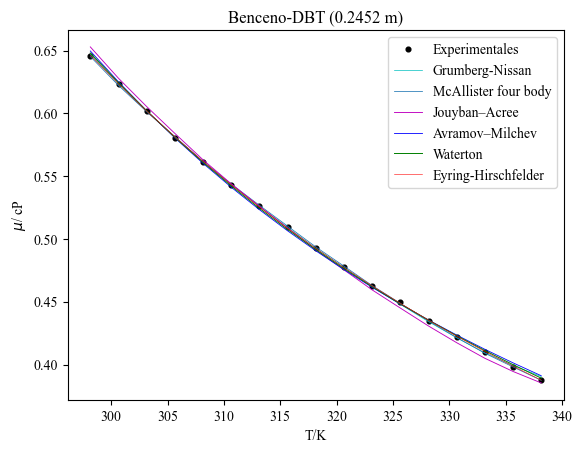

C:\Users\retou\AppData\Local\Temp\ipykernel_19248\987947322.py:48: RuntimeWarning: invalid value encountered in log
  mix_teo=np.exp(x1**4*np.log(mu1)+4*x1**3*x2*np.log(n1)+6*x1**2*x2**2*np.log(n2)+4*x1*x2**3*np.log(n3)+
C:\Users\retou\AppData\Local\Temp\ipykernel_19248\987947322.py:48: RuntimeWarning: invalid value encountered in log
  mix_teo=np.exp(x1**4*np.log(mu1)+4*x1**3*x2*np.log(n1)+6*x1**2*x2**2*np.log(n2)+4*x1*x2**3*np.log(n3)+


({'PAR_GN': array([2.4958392 , 0.01129479]),
  'PAR_JA': array([ 689.50377919, -903.87896996,  359.76200845]),
  'PAR_MC': array([ 2.25476741e+00, -3.81992238e-04,  9.48496736e+01, -2.80140661e-01,
          5.61052868e+00, -1.42051537e-02]),
  'PAR_AVM': array([9.26865150e-02, 2.78017784e+02, 2.39822437e+00]),
  'PAR_WT': array([2.74693063e-02, 2.68119490e+02, 1.26113478e+02]),
  'PAR_EH': array([1.28881020e+03, 2.70804129e+02, 5.00000000e-01])},
       T[K]  visc_exp   visc_GN   visc_JA   visc_MC  visc_AVM   visc_WT  \
 0   298.15    0.6459  0.647044  0.652853  0.645204  0.649613  0.648048   
 1   300.65    0.6235  0.623220  0.627876  0.622170  0.625013  0.624327   
 2   303.15    0.6018  0.601750  0.605349  0.601299  0.601991  0.601976   
 3   305.65    0.5806  0.581373  0.583996  0.581410  0.580420  0.580892   
 4   308.15    0.5614  0.561252  0.562968  0.561715  0.560181  0.560985   
 5   310.65    0.5431  0.542948  0.543828  0.543694  0.541170  0.542169   
 6   313.15    0.5259  

In [13]:
def GNissanC1(v_0):
    #Benceno-DBT
    T=MIX_C2B["T"].to_numpy(dtype=float)
    mix_exp=MIX_C2B["visc"].to_numpy(dtype=float)
    x1=0.0188 #DBT
    x2=1-x1
    mu1=DBT_VPURE["Viscosity (Liquid vs. Gas ) (N-sec/sqm)"].to_numpy(dtype=float)
    mu2=S_PURAB["visc"].to_numpy(dtype=float)
    G1 = v_0[0] ; G2 = v_0[1]
    G12 = G1 + G2 * T
    mix_teo=np.exp(x1*np.log(mu1)+x2*np.log(mu2)+x1*x2*G12)
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
#. Jouyban–Acree Viscosity Mode
def J_AcreeC1(v_0):
    #Benceno-DBT
    T=MIX_C2B["T"].to_numpy(dtype=float)
    mix_exp=MIX_C2B["visc"].to_numpy(dtype=float)
    x1=0.0188 #DBT
    x2=1-x1
    mu1=DBT_VPURE["Viscosity (Liquid vs. Gas ) (N-sec/sqm)"].to_numpy(dtype=float)
    mu2=S_PURAB["visc"].to_numpy(dtype=float)
    A0 = v_0[0] ; A1 = v_0[1]; A2 = v_0[2]
    l1=np.log(mu1) ; l2=np.log(mu2)
    mix_teo=np.exp(x1*l1+x2*l2+A0*(x1*x2/T)+A1*((x1*x2*(x1-x2))/T)+A2*((x1*x2*(x1-x2)**2)/T))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f    
#Mcallister 4
def MC4BC1(v_0):
    M1=184.26 ; M2=78.11
    T=MIX_C2B["T"].to_numpy(dtype=float)
    mix_exp=MIX_C2B["visc"].to_numpy(dtype=float)
    x1=0.0188 #DBT
    x2=1-x1
    mu1=DBT_VPURE["Viscosity (Liquid vs. Gas ) (N-sec/sqm)"].to_numpy(dtype=float)
    mu2=S_PURAB["visc"].to_numpy(dtype=float)
    K1=v_0[0] ; K2=v_0[1] ; K3=v_0[2]; K4=v_0[3]; K5=v_0[4]; K6=v_0[5]
    n1=K1+K2*T #n1112
    n2=K3+K4*T #n1122
    n3=K5+K6*T #n2221
    RM=M2/M1
    mix_teo=np.exp(x1**4*np.log(mu1)+4*x1**3*x2*np.log(n1)+6*x1**2*x2**2*np.log(n2)+4*x1*x2**3*np.log(n3)+
                  x2**4*np.log(mu2)-np.log(x1+x2*RM)+4*x1**3*x2*np.log((3+RM)/4)+6*x1**2*x2**2*np.log((1+RM)/2)+
                  4*x1*x2**3*np.log((1+3*RM)/4)+x2**4*np.log(RM))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f

#Avramov–Milchev (AM)
def AM(v_0):
    #Ciclohexano-DBT
    #298.15 K de temperatura
    T=MIX_C2B["T"].to_numpy(dtype=float)
    mix_exp=MIX_C2B["visc"].to_numpy()
    n=v_0[0] ;tao=v_0[1]; alpha=v_0[2]
    mix_teo=n*(10**((tao/T)**alpha))
    #10**(np.log10(n)+((tao/T)**alpha))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
#Waterton
def CM(v_0):
    #Ciclohexano-DBT
    #298.15 K de temperatura
    T=MIX_C2B["T"].to_numpy(dtype=float)
    mix_exp=MIX_C2B["visc"].to_numpy()
    n=v_0[0] ;k=v_0[1]; c=v_0[2]
    mix_teo=n*(10**((k*np.exp(c/T))/T))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
#Eyring-Hirschfelder
def EH(v_0):
    #Ciclohexano-DBT
    #298.15 K de temperatura
    T=MIX_C2B["T"].to_numpy(dtype=float)
    mix_exp=MIX_C2B["visc"].to_numpy()
    ER=v_0[0] ;TA=v_0[1]
    mix_teo=np.exp(ER*((1/T)-(1/TA)))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
def GModel_6(v_0,v_2,v_3,v_6):
    mix_exp=MIX_C2B["visc"].to_numpy()
    T=MIX_C2B["T"].to_numpy(dtype=float)
    #Parámetros G-Nissan
    x1=0.0188 #DBT
    x2=1-x1
    mu1=DBT_VPURE["Viscosity (Liquid vs. Gas ) (N-sec/sqm)"].to_numpy(dtype=float)
    mu2=S_PURAB["visc"].to_numpy(dtype=float)
    G1=minimize(GNissanC1,v_2,method="Nelder-Mead").x[0]
    G2=minimize(GNissanC1,v_2,method="Nelder-Mead").x[1]
    G12 = G1 + G2 * T    
    #Parámetros Jouyban–Acree
    A0 = minimize(J_AcreeC1,v_3,method="Nelder-Mead").x[0] 
    A1 = minimize(J_AcreeC1,v_3,method="Nelder-Mead").x[1]
    A2 = minimize(J_AcreeC1,v_3,method="Nelder-Mead").x[2]
    l1=np.log(mu1) ; l2=np.log(mu2)
    #Parámetros MC4
    M1=184.26 ; M2=78.11
    K1=minimize(MC4BC1,v_6,method="Nelder-Mead").x[0]  ; K2=minimize(MC4BC1,v_6,method="Nelder-Mead").x[1] 
    K3=minimize(MC4BC1,v_6,method="Nelder-Mead").x[2]; K4=minimize(MC4BC1,v_6,method="Nelder-Mead").x[3]
    K5=minimize(MC4BC1,v_6,method="Nelder-Mead").x[4]; K6=minimize(MC4BC1,v_6,method="Nelder-Mead").x[5]
    n1=K1+K2*T #n1112
    n2=K3+K4*T #n1122
    n3=K5+K6*T #n2221
    RM=M2/M1        
    #Parámetros AM
    n=minimize(AM,v_0,method="CG").x[0]
    tao=minimize(AM,v_0,method="CG").x[1]
    alpha=minimize(AM,v_0,method="CG").x[2]
    #Parámetros Waterton
    nC=minimize(CM,v_0,method="CG").x[0]
    k=minimize(CM,v_0,method="CG").x[1]
    c=minimize(CM,v_0,method="CG").x[2]    
    #Parámetros Eyring-Hirschfelder
    ER=minimize(EH,v_0).x[0]; TA=minimize(EH,v_0).x[1]
    mix_teoGN=np.exp(x1*np.log(mu1)+x2*np.log(mu2)+x1*x2*G12)
    mix_teoJA=np.exp(x1*l1+x2*l2+A0*(x1*x2/T)+A1*((x1*x2*(x1-x2))/T)+A2*((x1*x2*(x1-x2)**2)/T))   
    
    mix_teoMC=np.exp(x1**4*np.log(mu1)+4*x1**3*x2*np.log(n1)+6*x1**2*x2**2*np.log(n2)+4*x1*x2**3*np.log(n3)+
                  x2**4*np.log(mu2)-np.log(x1+x2*RM)+4*x1**3*x2*np.log((3+RM)/4)+6*x1**2*x2**2*np.log((1+RM)/2)+
                  4*x1*x2**3*np.log((1+3*RM)/4)+x2**4*np.log(RM))                
    mix_teoAM=n*(10**((tao/T)**alpha))
    mix_teoCM=nC*(10**((k*np.exp(c/T))/T))
    mix_teoEH=np.exp(ER*((1/T)-(1/TA)))
    plt.rcParams["font.family"] = "Times New Roman"
    plt.plot(T,mix_exp,"ko",markersize=3.4,label="Experimentales")
    plt.plot(T,mix_teoGN,"c-",label="Grumberg-Nissan",linewidth=0.5)        
    plt.plot(T,mix_teoMC,"-",label="McAllister four body",linewidth=0.55)        
    plt.plot(T,mix_teoJA,"m-",label="Jouyban–Acree",linewidth=0.65)                
    plt.plot(T,mix_teoAM,"b-",label="Avramov–Milchev",linewidth=0.6)
    plt.plot(T,mix_teoCM,"g-",label="Waterton",linewidth=0.7)
    plt.plot(T,mix_teoEH,"r-",label="Eyring-Hirschfelder",linewidth=0.4)
    plt.title("Benceno-DBT (0.2452 m)")
    plt.legend(loc="best")
    plt.xlabel("T/K")
    plt.ylabel("$\mu$/ cP")
    plt.savefig("Modelo_B_DBTC2.svg")
    plt.show()
    df_visc=pd.DataFrame({"T[K]":T,"visc_exp":mix_exp,"visc_GN":mix_teoGN,"visc_JA":mix_teoJA,"visc_MC":mix_teoMC,"visc_AVM":mix_teoAM,"visc_WT":mix_teoCM,"visc_EH":mix_teoEH,
                         "SSRES_GN":minimize(GNissanC1,v_2,method="Nelder-Mead").fun,"SSRES_JA":minimize(J_AcreeC1,v_3,method="Nelder-Mead").fun,"SSRES_MC":minimize(MC4BC1,v_6,method="Nelder-Mead").fun,
                          "SSRES_AVM":minimize(AM,v_0,method="CG").fun,"SSRES_WT":minimize(CM,v_0,method="CG").fun,"SSRES_EH":minimize(EH,v_0).fun})
    df_params={"PAR_GN":minimize(GNissanC1,v_2,method="Nelder-Mead").x,"PAR_JA":minimize(J_AcreeC1,v_3,method="Nelder-Mead").x,"PAR_MC":minimize(MC4BC1,v_6,method="Nelder-Mead").x,
                          "PAR_AVM":minimize(AM,v_0,method="CG").x,"PAR_WT":minimize(CM,v_0,method="CG").x,"PAR_EH":minimize(EH,v_0).x}    
    return df_params,df_visc                            
MM_6=GModel_6([0.001,20,0.5],[0.5,0.5],[1,1,1],[3.56724587e+00, -8.81969697e-03,  2.50106145e+02, -6.92537141e-01,
        2.57542014e+00, -6.36749260e-03])
MM_6

## Octano-DBT 0.1688 m

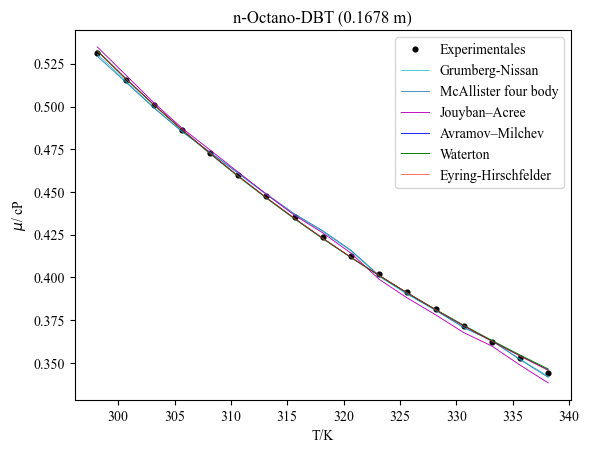

({'PAR_GN': array([0.30300073, 0.01268844]),
  'PAR_JA': array([ 481.46830152, -465.09197708,  451.67447574]),
  'PAR_MC': array([ 1.19706068e-01,  1.26903377e-01, -5.49731021e+00,  1.25982145e+01,
          2.52624783e+00, -6.37406370e-03]),
  'PAR_AVM': array([2.52703939e-02, 3.75712412e+02, 1.21316324e+00]),
  'PAR_WT': array([2.51542441e-02, 3.17256286e+02, 6.55700581e+01]),
  'PAR_EH': array([1.08891952e+03, 2.54245629e+02, 5.00000000e-01])},
       T[K]  visc_exp   visc_GN   visc_JA   visc_MC  visc_AVM   visc_WT  \
 0   298.15    0.5312  0.530609  0.534866  0.529387  0.532630  0.532645   
 1   300.65    0.5158  0.515131  0.518600  0.514374  0.516515  0.516430   
 2   303.15    0.5011  0.499590  0.502319  0.499264  0.501168  0.501013   
 3   305.65    0.4864  0.485405  0.487443  0.485397  0.486543  0.486345   
 4   308.15    0.4728  0.473179  0.474575  0.473347  0.472596  0.472378   
 5   310.65    0.4599  0.460781  0.461570  0.461104  0.459286  0.459069   
 6   313.15    0.4475  

In [14]:
def GNissanC1(v_0):
    #Octano-DBT
    T=MIX_C2O["T"].to_numpy(dtype=float)
    mix_exp=MIX_C2O["visc"].to_numpy(dtype=float)
    x1=0.0188 #DBT
    x2=1-x1
    mu1=DBT_VPURE["Viscosity (Liquid vs. Gas ) (N-sec/sqm)"].to_numpy(dtype=float)
    mu2=S_PURAO["visc"].to_numpy(dtype=float)
    G1 = v_0[0] ; G2 = v_0[1]
    G12 = G1 + G2 * T
    mix_teo=np.exp(x1*np.log(mu1)+x2*np.log(mu2)+x1*x2*G12)
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
#. Jouyban–Acree Viscosity Mode
def J_AcreeC1(v_0):
    #Octano-DBT
    T=MIX_C2O["T"].to_numpy(dtype=float)
    mix_exp=MIX_C2O["visc"].to_numpy(dtype=float)
    x1=0.0188 #DBT
    x2=1-x1
    mu1=DBT_VPURE["Viscosity (Liquid vs. Gas ) (N-sec/sqm)"].to_numpy(dtype=float)
    mu2=S_PURAO["visc"].to_numpy(dtype=float)
    A0 = v_0[0] ; A1 = v_0[1]; A2 = v_0[2]
    l1=np.log(mu1) ; l2=np.log(mu2)
    mix_teo=np.exp(x1*l1+x2*l2+A0*(x1*x2/T)+A1*((x1*x2*(x1-x2))/T)+A2*((x1*x2*(x1-x2)**2)/T))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f    
#Mcallister 4
def MC4BC1(v_0):
    M1=184.26 ; M2=114.23 
    T=MIX_C2O["T"].to_numpy(dtype=float)
    mix_exp=MIX_C2O["visc"].to_numpy(dtype=float)
    x1=0.0188 #DBT
    x2=1-x1
    mu1=DBT_VPURE["Viscosity (Liquid vs. Gas ) (N-sec/sqm)"].to_numpy(dtype=float)
    mu2=S_PURAO["visc"].to_numpy(dtype=float)
    K1=v_0[0] ; K2=v_0[1] ; K3=v_0[2]; K4=v_0[3]; K5=v_0[4]; K6=v_0[5]
    n1=K1+K2*T #n1112
    n2=K3+K4*T #n1122
    n3=K5+K6*T #n2221
    RM=M2/M1
    mix_teo=np.exp(x1**4*np.log(mu1)+4*x1**3*x2*np.log(n1)+6*x1**2*x2**2*np.log(n2)+4*x1*x2**3*np.log(n3)+
                  x2**4*np.log(mu2)-np.log(x1+x2*RM)+4*x1**3*x2*np.log((3+RM)/4)+6*x1**2*x2**2*np.log((1+RM)/2)+
                  4*x1*x2**3*np.log((1+3*RM)/4)+x2**4*np.log(RM))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f

#Avramov–Milchev (AM)
def AM(v_0):
    #Octano-DBT
    T=MIX_C2O["T"].to_numpy(dtype=float)
    mix_exp=MIX_C2O["visc"].to_numpy()
    n=v_0[0] ;tao=v_0[1]; alpha=v_0[2]
    mix_teo=n*(10**((tao/T)**alpha))
    #10**(np.log10(n)+((tao/T)**alpha))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
#Waterton
def CM(v_0):
    #Ciclohexano-DBT
    #298.15 K de temperatura
    T=MIX_C2O["T"].to_numpy(dtype=float)
    mix_exp=MIX_C2O["visc"].to_numpy()
    n=v_0[0] ;k=v_0[1]; c=v_0[2]
    mix_teo=n*(10**((k*np.exp(c/T))/T))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
#Eyring-Hirschfelder
def EH(v_0):
    #Ciclohexano-DBT
    #298.15 K de temperatura
    T=MIX_C2O["T"].to_numpy(dtype=float)
    mix_exp=MIX_C2O["visc"].to_numpy()
    ER=v_0[0] ;TA=v_0[1]
    mix_teo=np.exp(ER*((1/T)-(1/TA)))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
def GModel_7(v_0,v_2,v_3,v_6):
    mix_exp=MIX_C2O["visc"].to_numpy()
    T=MIX_C2O["T"].to_numpy(dtype=float)
    #Parámetros G-Nissan
    x1=0.0188 #DBT
    x2=1-x1
    mu1=DBT_VPURE["Viscosity (Liquid vs. Gas ) (N-sec/sqm)"].to_numpy(dtype=float)
    mu2=S_PURAO["visc"].to_numpy(dtype=float)
    G1=minimize(GNissanC1,v_2,method="Nelder-Mead").x[0]
    G2=minimize(GNissanC1,v_2,method="Nelder-Mead").x[1]
    G12 = G1 + G2 * T    
    #Parámetros Jouyban–Acree
    A0 = minimize(J_AcreeC1,v_3,method="COBYLA").x[0] 
    A1 = minimize(J_AcreeC1,v_3,method="COBYLA").x[1]
    A2 = minimize(J_AcreeC1,v_3,method="COBYLA").x[2]
    l1=np.log(mu1) ; l2=np.log(mu2)
    #Parámetros MC4
    M1=184.26 ; M2=114.23
    K1=minimize(MC4BC1,v_6,method="TNC").x[0]  ; K2=minimize(MC4BC1,v_6,method="TNC").x[1] 
    K3=minimize(MC4BC1,v_6,method="TNC").x[2]; K4=minimize(MC4BC1,v_6,method="TNC").x[3]
    K5=minimize(MC4BC1,v_6,method="TNC").x[4]; K6=minimize(MC4BC1,v_6,method="TNC").x[5]
    n1=K1+K2*T #n1112
    n2=K3+K4*T #n1122
    n3=K5+K6*T #n2221
    RM=M2/M1            
    #Parámetros AM
    n=minimize(AM,v_0,method="CG").x[0]
    tao=minimize(AM,v_0,method="CG").x[1]
    alpha=minimize(AM,v_0,method="CG").x[2]
    #Parámetros Waterton
    nC=minimize(CM,v_0,method="CG").x[0]
    k=minimize(CM,v_0,method="CG").x[1]
    c=minimize(CM,v_0,method="CG").x[2]    
    #Parámetros Eyring-Hirschfelder
    ER=minimize(EH,v_0).x[0]; TA=minimize(EH,v_0).x[1]
    mix_teoGN=np.exp(x1*np.log(mu1)+x2*np.log(mu2)+x1*x2*G12)
    mix_teoJA=np.exp(x1*l1+x2*l2+A0*(x1*x2/T)+A1*((x1*x2*(x1-x2))/T)+A2*((x1*x2*(x1-x2)**2)/T))   
    mix_teoMC=np.exp(x1**4*np.log(mu1)+4*x1**3*x2*np.log(n1)+6*x1**2*x2**2*np.log(n2)+4*x1*x2**3*np.log(n3)+
                  x2**4*np.log(mu2)-np.log(x1+x2*RM)+4*x1**3*x2*np.log((3+RM)/4)+6*x1**2*x2**2*np.log((1+RM)/2)+
                  4*x1*x2**3*np.log((1+3*RM)/4)+x2**4*np.log(RM))                    
    mix_teoAM=n*(10**((tao/T)**alpha))
    mix_teoCM=nC*(10**((k*np.exp(c/T))/T))
    mix_teoEH=np.exp(ER*((1/T)-(1/TA)))
    plt.rcParams["font.family"] = "Times New Roman"
    plt.plot(T,mix_exp,"ko",markersize=3.4,label="Experimentales")    
    plt.plot(T,mix_teoGN,"c-",label="Grumberg-Nissan",linewidth=0.5)        
    plt.plot(T,mix_teoMC,"-",label="McAllister four body",linewidth=0.55)        
    plt.plot(T,mix_teoJA,"m-",label="Jouyban–Acree",linewidth=0.65)             
    plt.plot(T,mix_teoAM,"b-",label="Avramov–Milchev",linewidth=0.6)
    plt.plot(T,mix_teoCM,"g-",label="Waterton",linewidth=0.7)
    plt.plot(T,mix_teoEH,"r-",label="Eyring-Hirschfelder",linewidth=0.4)
    plt.title("n-Octano-DBT (0.1678 m)")
    plt.legend(loc="best")
    plt.xlabel("T/K")
    plt.ylabel("$\mu$/ cP")
    plt.savefig("Modelo_O_DBTC2.svg")
    plt.show()
    df_visc=pd.DataFrame({"T[K]":T,"visc_exp":mix_exp,"visc_GN":mix_teoGN,"visc_JA":mix_teoJA,"visc_MC":mix_teoMC,"visc_AVM":mix_teoAM,"visc_WT":mix_teoCM,"visc_EH":mix_teoEH,
                         "SSRES_GN":minimize(GNissanC1,v_2,method="Nelder-Mead").fun,"SSRES_JA":minimize(J_AcreeC1,v_3,method="COBYLA").fun,"SSRES_MC":minimize(MC4BC1,v_6,method="TNC").fun,
                          "SSRES_AVM":minimize(AM,v_0,method="CG").fun,"SSRES_WT":minimize(CM,v_0,method="CG").fun,"SSRES_EH":minimize(EH,v_0).fun})
    df_params={"PAR_GN":minimize(GNissanC1,v_2,method="Nelder-Mead").x,"PAR_JA":minimize(J_AcreeC1,v_3,method="COBYLA").x,"PAR_MC":minimize(MC4BC1,v_6,method="TNC").x,
                          "PAR_AVM":minimize(AM,v_0,method="CG").x,"PAR_WT":minimize(CM,v_0,method="CG").x,"PAR_EH":minimize(EH,v_0).x}    
    return df_params,df_visc                            
MM_7=GModel_7([0.001,20,0.5],[0.2,0.1],[1,1,1],[ 1.19706068e-01,  1.26903377e-01, -5.49731021e+00,  1.25982146e+01,
        2.52624756e+00, -6.37406161e-03])
MM_7

## Ciclohexano-DBT 0.3044 m

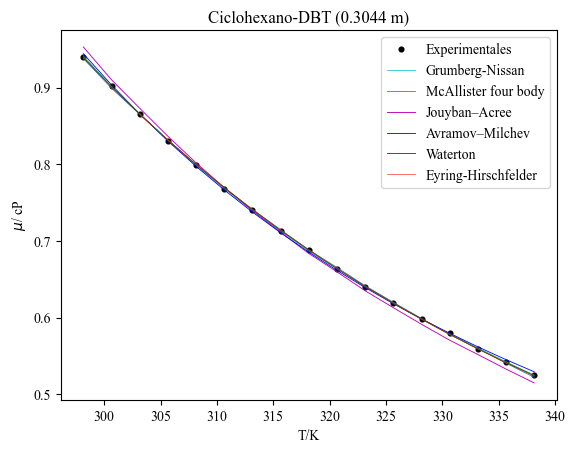

({'PAR_GN': array([-0.03690757,  0.01661549]),
  'PAR_JA': array([ 595.3229301 , -779.9089161 ,  310.52217894]),
  'PAR_MC': array([ 1.23160282e+00,  2.22583406e+02,  2.44365891e+01,  2.14782284e+01,
          4.89368234e+00, -1.27571796e-02]),
  'PAR_AVM': array([1.04644945e-01, 2.92587491e+02, 2.42451117e+00]),
  'PAR_WT': array([1.00051810e-02, 5.33668001e+02, 2.89807917e+01]),
  'PAR_EH': array([1.46987962e+03, 2.94364622e+02, 5.00000000e-01])},
       T[K]  visc_exp   visc_GN   visc_JA   visc_MC  visc_AVM   visc_WT  \
 0   298.15    0.9405  0.941371  0.953024  0.937922  0.944244  0.939459   
 1   300.65    0.9023  0.900986  0.910215  0.899112  0.903519  0.901351   
 2   303.15    0.8650  0.866019  0.873060  0.865217  0.865622  0.865434   
 3   305.65    0.8308  0.831540  0.836563  0.831689  0.830304  0.831551   
 4   308.15    0.7989  0.798671  0.801842  0.799576  0.797344  0.799559   
 5   310.65    0.7684  0.768225  0.769703  0.769642  0.766543  0.769327   
 6   313.15    0.7409

In [15]:
def GNissanC1(v_0):
    #Ciclohexano-DBT
    T=MIX_C3CH["T"].to_numpy(dtype=float)
    mix_exp=MIX_C3CH["visc"].to_numpy(dtype=float)
    x1=0.025 #DBT
    x2=1-x1
    mu1=DBT_VPURE["Viscosity (Liquid vs. Gas ) (N-sec/sqm)"].to_numpy(dtype=float)
    mu2=S_PURACH["visc"].to_numpy(dtype=float)
    G1 = v_0[0] ; G2 = v_0[1]
    G12 = G1 + G2 * T
    mix_teo=np.exp(x1*np.log(mu1)+x2*np.log(mu2)+x1*x2*G12)
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
#. Jouyban–Acree Viscosity Mode
def J_AcreeC1(v_0):
    #Ciclohexano-DBT
    T=MIX_C3CH["T"].to_numpy(dtype=float)
    mix_exp=MIX_C3CH["visc"].to_numpy(dtype=float)
    x1=0.025 #DBT
    x2=1-x1
    mu1=DBT_VPURE["Viscosity (Liquid vs. Gas ) (N-sec/sqm)"].to_numpy(dtype=float)
    mu2=S_PURACH["visc"].to_numpy(dtype=float)
    A0 = v_0[0] ; A1 = v_0[1]; A2 = v_0[2]
    l1=np.log(mu1) ; l2=np.log(mu2)
    mix_teo=np.exp(x1*l1+x2*l2+A0*(x1*x2/T)+A1*((x1*x2*(x1-x2))/T)+A2*((x1*x2*(x1-x2)**2)/T))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f    
#Mcallister 4
def MC4BC1(v_0):
    M1=184.26 ; M2=84.16 
    T=MIX_C3CH["T"].to_numpy(dtype=float)
    mix_exp=MIX_C3CH["visc"].to_numpy(dtype=float)
    x1=0.025 #DBT
    x2=1-x1
    mu1=DBT_VPURE["Viscosity (Liquid vs. Gas ) (N-sec/sqm)"].to_numpy(dtype=float)
    mu2=S_PURACH["visc"].to_numpy(dtype=float)
    K1=v_0[0] ; K2=v_0[1] ; K3=v_0[2]; K4=v_0[3]; K5=v_0[4]; K6=v_0[5]
    n1=K1+K2*T #n1112
    n2=K3+K4*T #n1122
    n3=K5+K6*T #n2221
    RM=M2/M1
    mix_teo=np.exp(x1**4*np.log(mu1)+4*x1**3*x2*np.log(n1)+6*x1**2*x2**2*np.log(n2)+4*x1*x2**3*np.log(n3)+
                  x2**4*np.log(mu2)-np.log(x1+x2*RM)+4*x1**3*x2*np.log((3+RM)/4)+6*x1**2*x2**2*np.log((1+RM)/2)+
                  4*x1*x2**3*np.log((1+3*RM)/4)+x2**4*np.log(RM))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
#Avramov–Milchev (AM)
def AM(v_0):
    #Ciclohexano-DBT
    #298.15 K de temperatura
    T=MIX_C3CH["T"].to_numpy(dtype=float)
    mix_exp=MIX_C3CH["visc"].to_numpy()
    n=v_0[0] ;tao=v_0[1]; alpha=v_0[2]
    mix_teo=n*(10**((tao/T)**alpha))
    #10**(np.log10(n)+((tao/T)**alpha))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
#Waterton
def CM(v_0):
    #Ciclohexano-DBT
    #298.15 K de temperatura
    T=MIX_C3CH["T"].to_numpy(dtype=float)
    mix_exp=MIX_C3CH["visc"].to_numpy()
    n=v_0[0] ;k=v_0[1]; c=v_0[2]
    mix_teo=n*(10**((k*np.exp(c/T))/T))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
#Eyring-Hirschfelder
def EH(v_0):
    #Ciclohexano-DBT
    #298.15 K de temperatura
    T=MIX_C3CH["T"].to_numpy(dtype=float)
    mix_exp=MIX_C3CH["visc"].to_numpy()
    ER=v_0[0] ;TA=v_0[1]
    mix_teo=np.exp(ER*((1/T)-(1/TA)))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
def GModel_8(v_0,v_2,v_3,v_6):
    mix_exp=MIX_C3CH["visc"].to_numpy()
    T=MIX_C3CH["T"].to_numpy(dtype=float)
    #Parámetros G-Nissan
    x1=0.025 #DBT
    x2=1-x1
    mu1=DBT_VPURE["Viscosity (Liquid vs. Gas ) (N-sec/sqm)"].to_numpy(dtype=float)
    mu2=S_PURACH["visc"].to_numpy(dtype=float)
    G1=minimize(GNissanC1,v_2,method="Nelder-Mead").x[0]
    G2=minimize(GNissanC1,v_2,method="Nelder-Mead").x[1]
    G12 = G1 + G2 * T    
    #Parámetros Jouyban–Acree
    A0 = minimize(J_AcreeC1,v_3,method="Nelder-Mead").x[0] 
    A1 = minimize(J_AcreeC1,v_3,method="Nelder-Mead").x[1]
    A2 = minimize(J_AcreeC1,v_3,method="Nelder-Mead").x[2]
    l1=np.log(mu1) ; l2=np.log(mu2)
    #Parámetros MC4
    M1=184.26 ; M2=84.16 
    K1=minimize(MC4BC1,v_6,method="Nelder-Mead").x[0]  ; K2=minimize(MC4BC1,v_6,method="Nelder-Mead").x[1] 
    K3=minimize(MC4BC1,v_6,method="Nelder-Mead").x[2]; K4=minimize(MC4BC1,v_6,method="Nelder-Mead").x[3]
    K5=minimize(MC4BC1,v_6,method="Nelder-Mead").x[4]; K6=minimize(MC4BC1,v_6,method="Nelder-Mead").x[5]
    n1=K1+K2*T #n1112
    n2=K3+K4*T #n1122
    n3=K5+K6*T #n2221
    RM=M2/M1
    #Parámetros AM
    n=minimize(AM,v_0,method="CG").x[0]
    tao=minimize(AM,v_0,method="CG").x[1]
    alpha=minimize(AM,v_0,method="CG").x[2]
    #Parámetros Waterton
    nC=minimize(CM,v_0,method="CG").x[0]
    k=minimize(CM,v_0,method="CG").x[1]
    c=minimize(CM,v_0,method="CG").x[2]    
    #Parámetros Eyring-Hirschfelder
    ER=minimize(EH,v_0).x[0]; TA=minimize(EH,v_0).x[1]
    mix_teoGN=np.exp(x1*np.log(mu1)+x2*np.log(mu2)+x1*x2*G12)
    mix_teoJA=np.exp(x1*l1+x2*l2+A0*(x1*x2/T)+A1*((x1*x2*(x1-x2))/T)+A2*((x1*x2*(x1-x2)**2)/T))   
    mix_teoMC=np.exp(x1**4*np.log(mu1)+4*x1**3*x2*np.log(n1)+6*x1**2*x2**2*np.log(n2)+4*x1*x2**3*np.log(n3)+
                  x2**4*np.log(mu2)-np.log(x1+x2*RM)+4*x1**3*x2*np.log((3+RM)/4)+6*x1**2*x2**2*np.log((1+RM)/2)+
                  4*x1*x2**3*np.log((1+3*RM)/4)+x2**4*np.log(RM))        
    mix_teoAM=n*(10**((tao/T)**alpha))
    mix_teoCM=nC*(10**((k*np.exp(c/T))/T))
    mix_teoEH=np.exp(ER*((1/T)-(1/TA)))
    plt.rcParams["font.family"] = "Times New Roman"
    plt.plot(T,mix_exp,"ko",markersize=3.4,label="Experimentales")
    plt.plot(T,mix_teoGN,"c-",label="Grumberg-Nissan",linewidth=0.5)        
    plt.plot(T,mix_teoMC,"-",label="McAllister four body",linewidth=0.55)        
    plt.plot(T,mix_teoJA,"m-",label="Jouyban–Acree",linewidth=0.65)        
    plt.plot(T,mix_teoAM,"b-",label="Avramov–Milchev",linewidth=0.6)
    plt.plot(T,mix_teoCM,"g-",label="Waterton",linewidth=0.7)
    plt.plot(T,mix_teoEH,"r-",label="Eyring-Hirschfelder",linewidth=0.4)
    plt.title("Ciclohexano-DBT (0.3044 m)")
    plt.legend(loc="best")
    plt.xlabel("T/K")
    plt.ylabel("$\mu$/ cP")
    plt.savefig("Modelo_CHDBTC3.svg")
    plt.show()
    df_visc=pd.DataFrame({"T[K]":T,"visc_exp":mix_exp,"visc_GN":mix_teoGN,"visc_JA":mix_teoJA,"visc_MC":mix_teoMC,"visc_AVM":mix_teoAM,"visc_WT":mix_teoCM,"visc_EH":mix_teoEH,
                         "SSRES_GN":minimize(GNissanC1,v_2,method="Nelder-Mead").fun,"SSRES_JA":minimize(J_AcreeC1,v_3,method="Nelder-Mead").fun,"SSRES_MC":minimize(MC4BC1,v_6,method="Nelder-Mead").fun,
                          "SSRES_AVM":minimize(AM,v_0,method="CG").fun,"SSRES_WT":minimize(CM,v_0,method="CG").fun,"SSRES_EH":minimize(EH,v_0).fun})
    df_params={"PAR_GN":minimize(GNissanC1,v_2,method="Nelder-Mead").x,"PAR_JA":minimize(J_AcreeC1,v_3,method="Nelder-Mead").x,"PAR_MC":minimize(MC4BC1,v_6,method="Nelder-Mead").x,
                          "PAR_AVM":minimize(AM,v_0,method="CG").x,"PAR_WT":minimize(CM,v_0,method="CG").x,"PAR_EH":minimize(EH,v_0).x}    
    return df_params,df_visc                            
MM_8=GModel_8([0.001,0.1,0.5],[0.2,0.5],[1,1,1],[-8.66725233e-01,  2.41034251e+01, -1.68137883e+01,  3.52159446e+00,
        6.05748701e+00, -1.55973884e-02])
MM_8

## Tolueno-DBT 0.2785 m

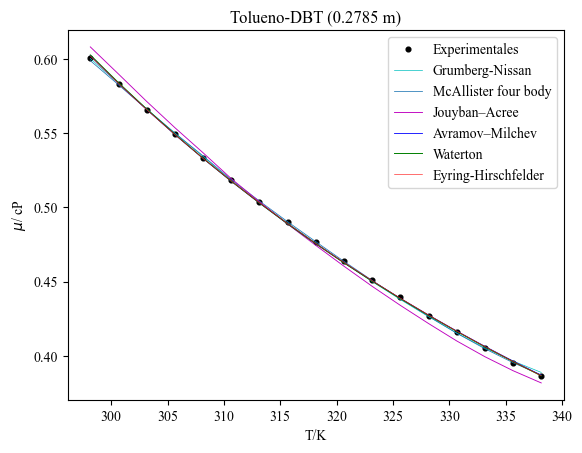

({'PAR_GN': array([1.32935571, 0.01413255]),
  'PAR_JA': array([ 666.54866684, -873.83432149,  347.82555353]),
  'PAR_MC': array([-9.24012609e-01,  2.01084241e+01, -1.58966400e+01,  4.87362046e+00,
          3.90978796e+00, -9.93494244e-03]),
  'PAR_AVM': array([2.26759093e-02, 4.05393402e+02, 1.15072801e+00]),
  'PAR_WT': array([1.83490034e-02, 4.14947664e+02, 2.55903470e+01]),
  'PAR_EH': array([-2.31424208e+02,  1.65455313e+05,  1.15048394e+00])},
       T[K]  visc_exp   visc_GN   visc_JA   visc_MC  visc_AVM   visc_WT  \
 0   298.15    0.6004  0.600261  0.608063  0.598806  0.602162  0.602676   
 1   300.65    0.5831  0.583449  0.589798  0.582554  0.583572  0.583984   
 2   303.15    0.5656  0.566377  0.571354  0.566006  0.565871  0.566190   
 3   305.65    0.5491  0.549988  0.553685  0.550040  0.549004  0.549238   
 4   308.15    0.5331  0.534280  0.536779  0.534657  0.532920  0.533078   
 5   310.65    0.5187  0.517988  0.519363  0.518685  0.517574  0.517661   
 6   313.15    0.503

In [16]:
def GNissanC1(v_0):
    #Tolueno-DBT
    T=MIX_C3T["T"].to_numpy(dtype=float)
    mix_exp=MIX_C3T["visc"].to_numpy(dtype=float)
    x1=0.025 #DBT
    x2=1-x1
    mu1=DBT_VPURE["Viscosity (Liquid vs. Gas ) (N-sec/sqm)"].to_numpy(dtype=float)
    mu2=S_PURAT["visc"].to_numpy(dtype=float)
    G1 = v_0[0] ; G2 = v_0[1]
    G12 = G1 + G2 * T
    mix_teo=np.exp(x1*np.log(mu1)+x2*np.log(mu2)+x1*x2*G12)
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
#. Jouyban–Acree Viscosity Mode
def J_AcreeC1(v_0):
    #Tolueno-DBT
    T=MIX_C3T["T"].to_numpy(dtype=float)
    mix_exp=MIX_C3T["visc"].to_numpy(dtype=float)
    x1=0.025 #DBT
    x2=1-x1
    mu1=DBT_VPURE["Viscosity (Liquid vs. Gas ) (N-sec/sqm)"].to_numpy(dtype=float)
    mu2=S_PURAT["visc"].to_numpy(dtype=float)
    A0 = v_0[0] ; A1 = v_0[1]; A2 = v_0[2]
    l1=np.log(mu1) ; l2=np.log(mu2)
    mix_teo=np.exp(x1*l1+x2*l2+A0*(x1*x2/T)+A1*((x1*x2*(x1-x2))/T)+A2*((x1*x2*(x1-x2)**2)/T))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f    
#Mcallister 4
def MC4BC1(v_0):
    M1=184.26 ; M2=92.14
    T=MIX_C3T["T"].to_numpy(dtype=float)
    mix_exp=MIX_C3T["visc"].to_numpy(dtype=float)
    x1=0.025 #DBT
    x2=1-x1
    mu1=DBT_VPURE["Viscosity (Liquid vs. Gas ) (N-sec/sqm)"].to_numpy(dtype=float)
    mu2=S_PURAT["visc"].to_numpy(dtype=float)
    K1=v_0[0] ; K2=v_0[1] ; K3=v_0[2]; K4=v_0[3]; K5=v_0[4]; K6=v_0[5]
    n1=K1+K2*T #n1112
    n2=K3+K4*T #n1122
    n3=K5+K6*T #n2221
    RM=M2/M1
    mix_teo=np.exp(x1**4*np.log(mu1)+4*x1**3*x2*np.log(n1)+6*x1**2*x2**2*np.log(n2)+4*x1*x2**3*np.log(n3)+
                  x2**4*np.log(mu2)-np.log(x1+x2*RM)+4*x1**3*x2*np.log((3+RM)/4)+6*x1**2*x2**2*np.log((1+RM)/2)+
                  4*x1*x2**3*np.log((1+3*RM)/4)+x2**4*np.log(RM))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
#Avramov–Milchev (AM)
def AM(v_0):
    #Tolueno-DBT
    #298.15 K de temperatura
    T=MIX_C3T["T"].to_numpy(dtype=float)
    mix_exp=MIX_C3T["visc"].to_numpy()
    n=v_0[0] ;tao=v_0[1]; alpha=v_0[2]
    mix_teo=n*(10**((tao/T)**alpha))
    #10**(np.log10(n)+((tao/T)**alpha))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
#Waterton
def CM(v_0):
    #Ciclohexano-DBT
    #298.15 K de temperatura
    T=MIX_C3T["T"].to_numpy(dtype=float)
    mix_exp=MIX_C3T["visc"].to_numpy()
    n=v_0[0] ;k=v_0[1]; c=v_0[2]
    mix_teo=n*(10**((k*np.exp(c/T))/T))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
#Eyring-Hirschfelder
def EH(v_0):
    #Ciclohexano-DBT
    #298.15 K de temperatura
    T=MIX_C3T["T"].to_numpy(dtype=float)
    mix_exp=MIX_C3T["visc"].to_numpy()
    ER=v_0[0] ;TA=v_0[1]
    mix_teo=np.exp(ER*((1/T)-(1/TA)))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
def GModel_9(v_0,v_2,v_3,v_6):
    mix_exp=MIX_C3T["visc"].to_numpy()
    T=MIX_C3T["T"].to_numpy(dtype=float)
    #Parámetros G-Nissan
    x1=0.025 #DBT
    x2=1-x1
    mu1=DBT_VPURE["Viscosity (Liquid vs. Gas ) (N-sec/sqm)"].to_numpy(dtype=float)
    mu2=S_PURAT["visc"].to_numpy(dtype=float)
    G1=minimize(GNissanC1,v_2,method="Nelder-Mead").x[0]
    G2=minimize(GNissanC1,v_2,method="Nelder-Mead").x[1]
    G12 = G1 + G2 * T    
    #Parámetros Jouyban–Acree
    A0 = minimize(J_AcreeC1,v_3,method="Nelder-Mead").x[0] 
    A1 = minimize(J_AcreeC1,v_3,method="Nelder-Mead").x[1]
    A2 = minimize(J_AcreeC1,v_3,method="Nelder-Mead").x[2]
    l1=np.log(mu1) ; l2=np.log(mu2)
    #Parámetros MC4
    M1=184.26 ; M2=92.14
    K1=minimize(MC4BC1,v_6,method="Nelder-Mead").x[0]  ; K2=minimize(MC4BC1,v_6,method="Nelder-Mead").x[1] 
    K3=minimize(MC4BC1,v_6,method="Nelder-Mead").x[2]; K4=minimize(MC4BC1,v_6,method="Nelder-Mead").x[3]
    K5=minimize(MC4BC1,v_6,method="Nelder-Mead").x[4]; K6=minimize(MC4BC1,v_6,method="Nelder-Mead").x[5]
    n1=K1+K2*T #n1112
    n2=K3+K4*T #n1122
    n3=K5+K6*T #n2221
    RM=M2/M1    
    #Parámetros AM
    n=minimize(AM,v_0,method="CG").x[0]
    tao=minimize(AM,v_0,method="CG").x[1]
    alpha=minimize(AM,v_0,method="CG").x[2]        
    #Parámetros Waterton
    nC=minimize(CM,v_0,method="CG").x[0]
    k=minimize(CM,v_0,method="CG").x[1]
    c=minimize(CM,v_0,method="CG").x[2]    
    #Parámetros Eyring-Hirschfelder
    ER=minimize(EH,v_3).x[0]; TA=minimize(EH,v_3).x[1]
    mix_teoAM=n*(10**((tao/T)**alpha))
    mix_teoCM=nC*(10**((k*np.exp(c/T))/T))
    mix_teoEH=np.exp(ER*((1/T)-(1/TA)))
    mix_teoGN=np.exp(x1*np.log(mu1)+x2*np.log(mu2)+x1*x2*G12)
    mix_teoJA=np.exp(x1*l1+x2*l2+A0*(x1*x2/T)+A1*((x1*x2*(x1-x2))/T)+A2*((x1*x2*(x1-x2)**2)/T))   
    mix_teoMC=np.exp(x1**4*np.log(mu1)+4*x1**3*x2*np.log(n1)+6*x1**2*x2**2*np.log(n2)+4*x1*x2**3*np.log(n3)+
                  x2**4*np.log(mu2)-np.log(x1+x2*RM)+4*x1**3*x2*np.log((3+RM)/4)+6*x1**2*x2**2*np.log((1+RM)/2)+
                  4*x1*x2**3*np.log((1+3*RM)/4)+x2**4*np.log(RM))            
    plt.rcParams["font.family"] = "Times New Roman"
    plt.plot(T,mix_exp,"ko",markersize=3.4,label="Experimentales")
    plt.plot(T,mix_teoGN,"c-",label="Grumberg-Nissan",linewidth=0.5)        
    plt.plot(T,mix_teoMC,"-",label="McAllister four body",linewidth=0.55)        
    plt.plot(T,mix_teoJA,"m-",label="Jouyban–Acree",linewidth=0.65)            
    plt.plot(T,mix_teoAM,"b-",label="Avramov–Milchev",linewidth=0.6)
    plt.plot(T,mix_teoCM,"g-",label="Waterton",linewidth=0.7)
    plt.plot(T,mix_teoEH,"r-",label="Eyring-Hirschfelder",linewidth=0.4)
    plt.title("Tolueno-DBT (0.2785 m)")
    plt.legend(loc="best")
    plt.xlabel("T/K")
    plt.ylabel("$\mu$/ cP")
    plt.savefig("Modelo_TOLDBTC3.svg")
    plt.show()
    df_visc=pd.DataFrame({"T[K]":T,"visc_exp":mix_exp,"visc_GN":mix_teoGN,"visc_JA":mix_teoJA,"visc_MC":mix_teoMC,"visc_AVM":mix_teoAM,"visc_WT":mix_teoCM,"visc_EH":mix_teoEH,
                         "SSRES_GN":minimize(GNissanC1,v_2,method="Nelder-Mead").fun,"SSRES_JA":minimize(J_AcreeC1,v_3,method="Nelder-Mead").fun,"SSRES_MC":minimize(MC4BC1,v_6,method="Nelder-Mead").fun,
                          "SSRES_AVM":minimize(AM,v_0,method="CG").fun,"SSRES_WT":minimize(CM,v_0,method="CG").fun,"SSRES_EH":minimize(EH,v_0).fun})
    df_params={"PAR_GN":minimize(GNissanC1,v_2,method="Nelder-Mead").x,"PAR_JA":minimize(J_AcreeC1,v_3,method="Nelder-Mead").x,"PAR_MC":minimize(MC4BC1,v_6,method="Nelder-Mead").x,
                          "PAR_AVM":minimize(AM,v_0,method="CG").x,"PAR_WT":minimize(CM,v_0,method="CG").x,"PAR_EH":minimize(EH,v_0).x}    
    return df_params,df_visc                            
MM_9=GModel_9([2.26784179e-02, 4.05393401e+02, 1.15048394e+00],[0.2,0.2],[1,1,1],[-8.66725233e-01,  2.41034251e+01, -1.68137883e+01,  3.52159446e+00,
        6.05748701e+00, -1.55973884e-02])
MM_9

## Benceno-DBT 0.3284 m

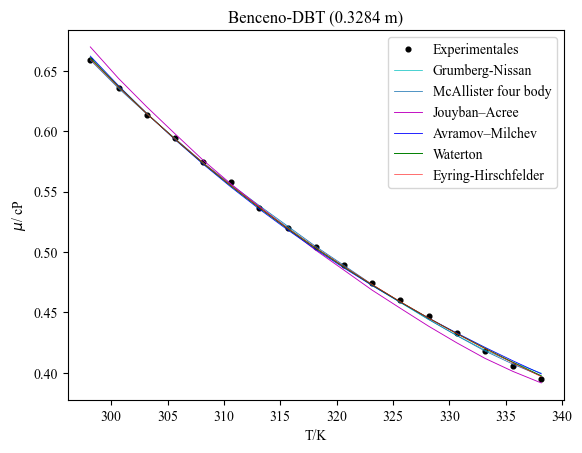

({'PAR_GN': array([1.17331261, 0.01585287]),
  'PAR_JA': array([ 709.13559914, -929.25892404,  370.0045459 ]),
  'PAR_MC': array([ 0.1105395 ,  0.03808627, -3.13875474,  9.30330369,  4.80059029,
         -0.01237667]),
  'PAR_AVM': array([6.56921634e-02, 2.98675890e+02, 1.96357228e+00]),
  'PAR_WT': array([1.69137882e-02, 3.89790534e+02, 5.86869968e+01]),
  'PAR_EH': array([1.28096578e+03, 2.71833094e+02, 1.00000000e+00])},
       T[K]  visc_exp   visc_GN   visc_JA   visc_MC  visc_AVM   visc_WT  \
 0   298.15    0.6589  0.660736  0.669810  0.658930  0.662186  0.660718   
 1   300.65    0.6355  0.636490  0.643764  0.635571  0.637766  0.637087   
 2   303.15    0.6134  0.614638  0.620263  0.614364  0.614808  0.614735   
 3   305.65    0.5942  0.593902  0.598000  0.594134  0.593202  0.593575   
 4   308.15    0.5748  0.573429  0.576110  0.574097  0.572846  0.573527   
 5   310.65    0.5576  0.554805  0.556179  0.555727  0.553647  0.554515   
 6   313.15    0.5365  0.537391  0.537552  0.53

In [17]:
def GNissanC1(v_0):
    #Benceno-DBT
    T=MIX_C3B["T"].to_numpy(dtype=float)
    mix_exp=MIX_C3B["visc"].to_numpy(dtype=float)
    x1=0.025 #DBT
    x2=1-x1
    mu1=DBT_VPURE["Viscosity (Liquid vs. Gas ) (N-sec/sqm)"].to_numpy(dtype=float)
    mu2=S_PURAB["visc"].to_numpy(dtype=float)
    G1 = v_0[0] ; G2 = v_0[1]
    G12 = G1 + G2 * T
    mix_teo=np.exp(x1*np.log(mu1)+x2*np.log(mu2)+x1*x2*G12)
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
#. Jouyban–Acree Viscosity Mode
def J_AcreeC1(v_0):
    #Benceno-DBT
    T=MIX_C3B["T"].to_numpy(dtype=float)
    mix_exp=MIX_C3B["visc"].to_numpy(dtype=float)
    x1=0.025 #DBT
    x2=1-x1
    mu1=DBT_VPURE["Viscosity (Liquid vs. Gas ) (N-sec/sqm)"].to_numpy(dtype=float)
    mu2=S_PURAB["visc"].to_numpy(dtype=float)
    A0 = v_0[0] ; A1 = v_0[1]; A2 = v_0[2]
    l1=np.log(mu1) ; l2=np.log(mu2)
    mix_teo=np.exp(x1*l1+x2*l2+A0*(x1*x2/T)+A1*((x1*x2*(x1-x2))/T)+A2*((x1*x2*(x1-x2)**2)/T))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f    
#Mcallister 4
def MC4BC1(v_0):
    M1=184.26 ; M2=78.11
    T=MIX_C3B["T"].to_numpy(dtype=float)
    mix_exp=MIX_C3B["visc"].to_numpy(dtype=float)
    x1=0.025 #DBT
    x2=1-x1
    mu1=DBT_VPURE["Viscosity (Liquid vs. Gas ) (N-sec/sqm)"].to_numpy(dtype=float)
    mu2=S_PURAB["visc"].to_numpy(dtype=float)
    K1=v_0[0] ; K2=v_0[1] ; K3=v_0[2]; K4=v_0[3]; K5=v_0[4]; K6=v_0[5]
    n1=K1+K2*T #n1112
    n2=K3+K4*T #n1122
    n3=K5+K6*T #n2221
    RM=M2/M1
    mix_teo=np.exp(x1**4*np.log(mu1)+4*x1**3*x2*np.log(n1)+6*x1**2*x2**2*np.log(n2)+4*x1*x2**3*np.log(n3)+
                  x2**4*np.log(mu2)-np.log(x1+x2*RM)+4*x1**3*x2*np.log((3+RM)/4)+6*x1**2*x2**2*np.log((1+RM)/2)+
                  4*x1*x2**3*np.log((1+3*RM)/4)+x2**4*np.log(RM))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f

#Avramov–Milchev (AM)
def AM(v_0):
    #Ciclohexano-DBT
    #298.15 K de temperatura
    T=MIX_C3B["T"].to_numpy(dtype=float)
    mix_exp=MIX_C3B["visc"].to_numpy()
    n=v_0[0] ;tao=v_0[1]; alpha=v_0[2]
    mix_teo=n*(10**((tao/T)**alpha))
    #10**(np.log10(n)+((tao/T)**alpha))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
#
def CM(v_0):
    #Ciclohexano-DBT
    #298.15 K de temperatura
    T=MIX_C3B["T"].to_numpy(dtype=float)
    mix_exp=MIX_C3B["visc"].to_numpy()
    n=v_0[0] ;k=v_0[1]; c=v_0[2]
    mix_teo=n*(10**((k*np.exp(c/T))/T))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
#Eyring-Hirschfelder
def EH(v_0):
    #Ciclohexano-DBT
    #298.15 K de temperatura
    T=MIX_C3B["T"].to_numpy(dtype=float)
    mix_exp=MIX_C3B["visc"].to_numpy()
    ER=v_0[0] ;TA=v_0[1]
    mix_teo=np.exp(ER*((1/T)-(1/TA)))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
def GModel_10(v_0,v_2,v_3,v_6):
    mix_exp=MIX_C3B["visc"].to_numpy()
    T=MIX_C3B["T"].to_numpy(dtype=float)
    #Parámetros G-Nissan
    x1=0.025 #DBT
    x2=1-x1
    mu1=DBT_VPURE["Viscosity (Liquid vs. Gas ) (N-sec/sqm)"].to_numpy(dtype=float)
    mu2=S_PURAB["visc"].to_numpy(dtype=float)
    G1=minimize(GNissanC1,v_2,method="Nelder-Mead").x[0]
    G2=minimize(GNissanC1,v_2,method="Nelder-Mead").x[1]
    G12 = G1 + G2 * T    
    #Parámetros Jouyban–Acree
    A0 = minimize(J_AcreeC1,v_3,method="Nelder-Mead").x[0] 
    A1 = minimize(J_AcreeC1,v_3,method="Nelder-Mead").x[1]
    A2 = minimize(J_AcreeC1,v_3,method="Nelder-Mead").x[2]
    l1=np.log(mu1) ; l2=np.log(mu2)
    #Parámetros MC4
    M1=184.26 ; M2=78.11
    K1=minimize(MC4BC1,v_6,method="Nelder-Mead").x[0]  ; K2=minimize(MC4BC1,v_6,method="Nelder-Mead").x[1] 
    K3=minimize(MC4BC1,v_6,method="Nelder-Mead").x[2]; K4=minimize(MC4BC1,v_6,method="Nelder-Mead").x[3]
    K5=minimize(MC4BC1,v_6,method="Nelder-Mead").x[4]; K6=minimize(MC4BC1,v_6,method="Nelder-Mead").x[5]
    n1=K1+K2*T #n1112
    n2=K3+K4*T #n1122
    n3=K5+K6*T #n2221
    RM=M2/M1        
    #Parámetros AM
    n=minimize(AM,v_0,method="CG").x[0]
    tao=minimize(AM,v_0,method="CG").x[1]
    alpha=minimize(AM,v_0,method="CG").x[2]
    #Parámetros Waterton
    nC=minimize(CM,v_0,method="CG").x[0]
    k=minimize(CM,v_0,method="CG").x[1]
    c=minimize(CM,v_0,method="CG").x[2]    
    #Parámetros Eyring-Hirschfelder
    ER=minimize(EH,v_0).x[0]; TA=minimize(EH,v_0).x[1]
    mix_teoGN=np.exp(x1*np.log(mu1)+x2*np.log(mu2)+x1*x2*G12)
    mix_teoJA=np.exp(x1*l1+x2*l2+A0*(x1*x2/T)+A1*((x1*x2*(x1-x2))/T)+A2*((x1*x2*(x1-x2)**2)/T))   
    mix_teoMC=np.exp(x1**4*np.log(mu1)+4*x1**3*x2*np.log(n1)+6*x1**2*x2**2*np.log(n2)+4*x1*x2**3*np.log(n3)+
                  x2**4*np.log(mu2)-np.log(x1+x2*RM)+4*x1**3*x2*np.log((3+RM)/4)+6*x1**2*x2**2*np.log((1+RM)/2)+
                  4*x1*x2**3*np.log((1+3*RM)/4)+x2**4*np.log(RM))                
    mix_teoAM=n*(10**((tao/T)**alpha))
    mix_teoCM=nC*(10**((k*np.exp(c/T))/T))
    mix_teoEH=np.exp(ER*((1/T)-(1/TA)))
    plt.rcParams["font.family"] = "Times New Roman"
    plt.plot(T,mix_exp,"ko",markersize=3.4,label="Experimentales")
    plt.plot(T,mix_teoGN,"c-",label="Grumberg-Nissan",linewidth=0.5)        
    plt.plot(T,mix_teoMC,"-",label="McAllister four body",linewidth=0.55)        
    plt.plot(T,mix_teoJA,"m-",label="Jouyban–Acree",linewidth=0.65)                
    plt.plot(T,mix_teoAM,"b-",label="Avramov–Milchev",linewidth=0.6)
    plt.plot(T,mix_teoCM,"g-",label="Waterton",linewidth=0.7)
    plt.plot(T,mix_teoEH,"r-",label="Eyring-Hirschfelder",linewidth=0.4)
    plt.title("Benceno-DBT (0.3284 m)")
    plt.legend(loc="best")
    plt.xlabel("T/K")
    plt.ylabel("$\mu$/ cP")
    plt.savefig("Modelo_B_DBTC3.svg")
    plt.show()
    df_visc=pd.DataFrame({"T[K]":T,"visc_exp":mix_exp,"visc_GN":mix_teoGN,"visc_JA":mix_teoJA,"visc_MC":mix_teoMC,"visc_AVM":mix_teoAM,"visc_WT":mix_teoCM,"visc_EH":mix_teoEH,
                         "SSRES_GN":minimize(GNissanC1,v_2,method="Nelder-Mead").fun,"SSRES_JA":minimize(J_AcreeC1,v_3,method="Nelder-Mead").fun,"SSRES_MC":minimize(MC4BC1,v_6,method="Nelder-Mead").fun,
                          "SSRES_AVM":minimize(AM,v_0,method="CG").fun,"SSRES_WT":minimize(CM,v_0,method="CG").fun,"SSRES_EH":minimize(EH,v_0).fun})
    df_params={"PAR_GN":minimize(GNissanC1,v_2,method="Nelder-Mead").x,"PAR_JA":minimize(J_AcreeC1,v_3,method="Nelder-Mead").x,"PAR_MC":minimize(MC4BC1,v_6,method="Nelder-Mead").x,
                          "PAR_AVM":minimize(AM,v_0,method="CG").x,"PAR_WT":minimize(CM,v_0,method="CG").x,"PAR_EH":minimize(EH,v_0).x}    
    return df_params,df_visc                            
MM_10=GModel_10([1,1,1],[0.5,0.5],[1,1,1],[ 1.19706068e-01,  1.26903377e-01, -5.49731021e+00,  1.25982146e+01,
        2.52624756e+00, -6.37406161e-03])
MM_10

## Octano-DBT 0.2247 m

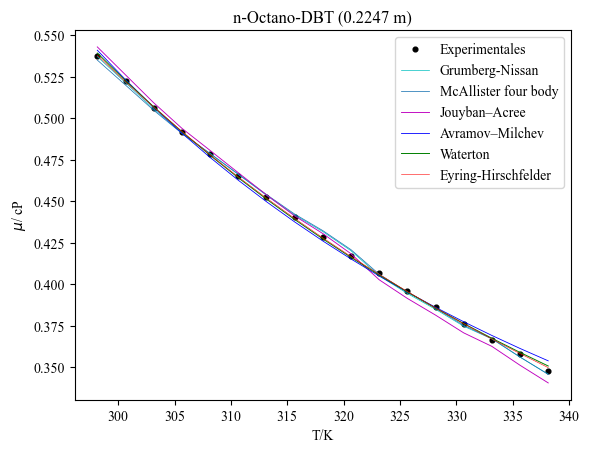

({'PAR_GN': array([0.22996425, 0.01319536]),
  'PAR_JA': array([ 499.47454413, -487.45983573,  454.71551931]),
  'PAR_MC': array([ 3.56698698e+00, -8.81904581e-03,  2.80106681e+02, -6.92538393e-01,
          2.57542002e+00, -6.36749229e-03]),
  'PAR_AVM': array([1.39488122e-01, 2.49652392e+02, 2.98434592e+00]),
  'PAR_WT': array([3.37462120e-02, 2.49901786e+02, 1.07899283e+02]),
  'PAR_EH': array([1.08561470e+03, 2.54788337e+02, 5.00000000e-01])},
       T[K]  visc_exp   visc_GN   visc_JA   visc_MC  visc_AVM   visc_WT  \
 0   298.15    0.5373  0.537264  0.543067  0.535139  0.541076  0.539368   
 1   300.65    0.5223  0.521515  0.526232  0.520067  0.523322  0.522745   
 2   303.15    0.5061  0.505716  0.509413  0.504898  0.506701  0.506977   
 3   305.65    0.4918  0.491292  0.494039  0.490955  0.491120  0.492005   
 4   308.15    0.4783  0.478849  0.480712  0.478807  0.476495  0.477779   
 5   310.65    0.4651  0.466243  0.467272  0.466469  0.462751  0.464250   
 6   313.15    0.4525  

In [18]:
def GNissanC1(v_0):
    #Octano-DBT
    T=MIX_C3O["T"].to_numpy(dtype=float)
    mix_exp=MIX_C3O["visc"].to_numpy(dtype=float)
    x1=0.025 #DBT
    x2=1-x1
    mu1=DBT_VPURE["Viscosity (Liquid vs. Gas ) (N-sec/sqm)"].to_numpy(dtype=float)
    mu2=S_PURAO["visc"].to_numpy(dtype=float)
    G1 = v_0[0] ; G2 = v_0[1]
    G12 = G1 + G2 * T
    mix_teo=np.exp(x1*np.log(mu1)+x2*np.log(mu2)+x1*x2*G12)
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
#. Jouyban–Acree Viscosity Mode
def J_AcreeC1(v_0):
    #Octano-DBT
    T=MIX_C3O["T"].to_numpy(dtype=float)
    mix_exp=MIX_C3O["visc"].to_numpy(dtype=float)
    x1=0.025 #DBT
    x2=1-x1
    mu1=DBT_VPURE["Viscosity (Liquid vs. Gas ) (N-sec/sqm)"].to_numpy(dtype=float)
    mu2=S_PURAO["visc"].to_numpy(dtype=float)
    A0 = v_0[0] ; A1 = v_0[1]; A2 = v_0[2]
    l1=np.log(mu1) ; l2=np.log(mu2)
    mix_teo=np.exp(x1*l1+x2*l2+A0*(x1*x2/T)+A1*((x1*x2*(x1-x2))/T)+A2*((x1*x2*(x1-x2)**2)/T))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f    
#Mcallister 4
def MC4BC1(v_0):
    M1=184.26 ; M2=114.23 
    T=MIX_C3O["T"].to_numpy(dtype=float)
    mix_exp=MIX_C3O["visc"].to_numpy(dtype=float)
    x1=0.025 #DBT
    x2=1-x1
    mu1=DBT_VPURE["Viscosity (Liquid vs. Gas ) (N-sec/sqm)"].to_numpy(dtype=float)
    mu2=S_PURAO["visc"].to_numpy(dtype=float)
    K1=v_0[0] ; K2=v_0[1] ; K3=v_0[2]; K4=v_0[3]; K5=v_0[4]; K6=v_0[5]
    n1=K1+K2*T #n1112
    n2=K3+K4*T #n1122
    n3=K5+K6*T #n2221
    RM=M2/M1
    mix_teo=np.exp(x1**4*np.log(mu1)+4*x1**3*x2*np.log(n1)+6*x1**2*x2**2*np.log(n2)+4*x1*x2**3*np.log(n3)+
                  x2**4*np.log(mu2)-np.log(x1+x2*RM)+4*x1**3*x2*np.log((3+RM)/4)+6*x1**2*x2**2*np.log((1+RM)/2)+
                  4*x1*x2**3*np.log((1+3*RM)/4)+x2**4*np.log(RM))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f

#Avramov–Milchev (AM)
def AM(v_0):
    #Octano-DBT
    T=MIX_C3O["T"].to_numpy(dtype=float)
    mix_exp=MIX_C3O["visc"].to_numpy()
    n=v_0[0] ;tao=v_0[1]; alpha=v_0[2]
    mix_teo=n*(10**((tao/T)**alpha))
    #10**(np.log10(n)+((tao/T)**alpha))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
#Waterton
def CM(v_0):
    #Ciclohexano-DBT
    #298.15 K de temperatura
    T=MIX_C3O["T"].to_numpy(dtype=float)
    mix_exp=MIX_C3O["visc"].to_numpy()
    n=v_0[0] ;k=v_0[1]; c=v_0[2]
    mix_teo=n*(10**((k*np.exp(c/T))/T))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
#Eyring-Hirschfelder
def EH(v_0):
    #Ciclohexano-DBT
    #298.15 K de temperatura
    T=MIX_C3O["T"].to_numpy(dtype=float)
    mix_exp=MIX_C3O["visc"].to_numpy()
    ER=v_0[0] ;TA=v_0[1]
    mix_teo=np.exp(ER*((1/T)-(1/TA)))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
def GModel_11(v_0,v_2,v_3,v_6):
    mix_exp=MIX_C3O["visc"].to_numpy()
    T=MIX_C3O["T"].to_numpy(dtype=float)
    #Parámetros G-Nissan
    x1=0.025 #DBT
    x2=1-x1
    mu1=DBT_VPURE["Viscosity (Liquid vs. Gas ) (N-sec/sqm)"].to_numpy(dtype=float)
    mu2=S_PURAO["visc"].to_numpy(dtype=float)
    G1=minimize(GNissanC1,v_2,method="Nelder-Mead").x[0]
    G2=minimize(GNissanC1,v_2,method="Nelder-Mead").x[1]
    G12 = G1 + G2 * T    
    #Parámetros Jouyban–Acree
    A0 = minimize(J_AcreeC1,v_3,method="COBYLA").x[0] 
    A1 = minimize(J_AcreeC1,v_3,method="COBYLA").x[1]
    A2 = minimize(J_AcreeC1,v_3,method="COBYLA").x[2]
    l1=np.log(mu1) ; l2=np.log(mu2)
    #Parámetros MC4
    M1=184.26 ; M2=114.23
    K1=minimize(MC4BC1,v_6,method="Nelder-Mead").x[0]  ; K2=minimize(MC4BC1,v_6,method="Nelder-Mead").x[1] 
    K3=minimize(MC4BC1,v_6,method="Nelder-Mead").x[2]; K4=minimize(MC4BC1,v_6,method="Nelder-Mead").x[3]
    K5=minimize(MC4BC1,v_6,method="Nelder-Mead").x[4]; K6=minimize(MC4BC1,v_6,method="Nelder-Mead").x[5]
    n1=K1+K2*T #n1112
    n2=K3+K4*T #n1122
    n3=K5+K6*T #n2221
    RM=M2/M1            
    #Parámetros AM
    n=minimize(AM,v_0,method="CG").x[0]
    tao=minimize(AM,v_0,method="CG").x[1]
    alpha=minimize(AM,v_0,method="CG").x[2]
    #Parámetros Adam-Gibbs modificado
    nC=minimize(CM,v_0,method="CG").x[0]
    k=minimize(CM,v_0,method="CG").x[1]
    c=minimize(CM,v_0,method="CG").x[2]    
    #Parámetros Eyring-Hirschfelder
    ER=minimize(EH,v_0).x[0]; TA=minimize(EH,v_0).x[1]
    mix_teoGN=np.exp(x1*np.log(mu1)+x2*np.log(mu2)+x1*x2*G12)
    mix_teoJA=np.exp(x1*l1+x2*l2+A0*(x1*x2/T)+A1*((x1*x2*(x1-x2))/T)+A2*((x1*x2*(x1-x2)**2)/T))   
    mix_teoMC=np.exp(x1**4*np.log(mu1)+4*x1**3*x2*np.log(n1)+6*x1**2*x2**2*np.log(n2)+4*x1*x2**3*np.log(n3)+
                  x2**4*np.log(mu2)-np.log(x1+x2*RM)+4*x1**3*x2*np.log((3+RM)/4)+6*x1**2*x2**2*np.log((1+RM)/2)+
                  4*x1*x2**3*np.log((1+3*RM)/4)+x2**4*np.log(RM))                    
    mix_teoAM=n*(10**((tao/T)**alpha))
    mix_teoCM=nC*(10**((k*np.exp(c/T))/T))
    mix_teoEH=np.exp(ER*((1/T)-(1/TA)))
    plt.rcParams["font.family"] = "Times New Roman"
    plt.plot(T,mix_exp,"ko",markersize=3.4,label="Experimentales")    
    plt.plot(T,mix_teoGN,"c-",label="Grumberg-Nissan",linewidth=0.5)        
    plt.plot(T,mix_teoMC,"-",label="McAllister four body",linewidth=0.55)        
    plt.plot(T,mix_teoJA,"m-",label="Jouyban–Acree",linewidth=0.65)             
    plt.plot(T,mix_teoAM,"b-",label="Avramov–Milchev",linewidth=0.6)
    plt.plot(T,mix_teoCM,"g-",label="Waterton",linewidth=0.7)
    plt.plot(T,mix_teoEH,"r-",label="Eyring-Hirschfelder",linewidth=0.4)
    plt.title("n-Octano-DBT (0.2247 m)")
    plt.legend(loc="best")
    plt.xlabel("T/K")
    plt.ylabel("$\mu$/ cP")
    plt.savefig("Modelo_O_DBTC3.svg")
    plt.show()
    df_visc=pd.DataFrame({"T[K]":T,"visc_exp":mix_exp,"visc_GN":mix_teoGN,"visc_JA":mix_teoJA,"visc_MC":mix_teoMC,"visc_AVM":mix_teoAM,"visc_WT":mix_teoCM,"visc_EH":mix_teoEH,
                         "SSRES_GN":minimize(GNissanC1,v_2,method="Nelder-Mead").fun,"SSRES_JA":minimize(J_AcreeC1,v_3,method="COBYLA").fun,"SSRES_MC":minimize(MC4BC1,v_6,method="Nelder-Mead").fun,
                          "SSRES_AVM":minimize(AM,v_0,method="CG").fun,"SSRES_WT":minimize(CM,v_0,method="CG").fun,"SSRES_EH":minimize(EH,v_0).fun})
    df_params={"PAR_GN":minimize(GNissanC1,v_2,method="Nelder-Mead").x,"PAR_JA":minimize(J_AcreeC1,v_3,method="COBYLA").x,"PAR_MC":minimize(MC4BC1,v_6,method="Nelder-Mead").x,
                          "PAR_AVM":minimize(AM,v_0,method="CG").x,"PAR_WT":minimize(CM,v_0,method="CG").x,"PAR_EH":minimize(EH,v_0).x}    
    return df_params,df_visc                            
MM_11=GModel_11([0.001,20,0.5],[0.2,0.1],[1,1,1],[ 3.56724587e+00, -8.81969697e-03,  2.80106145e+02, -6.92537141e-01,
        2.57542014e+00, -6.36749260e-03])
MM_11

In [19]:
#Generar un excel de resumen de todos los modelos de viscosidad
LIST_SHEET=["Model_vis_CHDBTC1","Model_vis_TOLDBTC1","Model_vis_B_DBTC1","Model_vis_O_DBTC1",
            "Model_vis_CHDBTC2","Model_vis_TOLDBTC2","Model_vis_B_DBTC2","Model_vis_O_DBTC2",
            "Model_vis_CHDBTC3","Model_vis_TOLDBTC3","Model_vis_B_DBTC3","Model_vis_O_DBTC3"]
mm_s=[MM_0[1],MM_1[1],MM_2[1],MM_3[1],MM_4[1],MM_5[1],MM_6[1],MM_7[1],MM_8[1],MM_9[1],MM_10[1],MM_11[1]]
writer_m=pd.ExcelWriter("Tablas de Modelos viscosidad2.xlsx",engine="xlsxwriter")
for i, df_ms in enumerate(mm_s):
    df_ms.to_excel(writer_m,sheet_name=LIST_SHEET[i],index=False)
#mm_s[i].to_excel(,sheet_name=LIST_SHEET[i])
writer_m.save()


In [20]:
MM_11[0]['PAR_GN']

array([0.22996425, 0.01319536])

In [21]:
#Generar excel resumen de parametros optimizados viscosidad
List_keys=['PAR_GN', 'PAR_JA', 'PAR_MC', 'PAR_AVM', 'PAR_WT', 'PAR_EH']
DIC_S=[MM_0[0],MM_1[0],MM_2[0],MM_3[0],MM_4[0],MM_5[0],MM_6[0],MM_7[0],MM_8[0],MM_9[0],MM_10[0],MM_11[0]]
LP_GN=[DIC_S[k][List_keys[0]] for k in range(0,len(DIC_S))]
LP_JA=[DIC_S[k][List_keys[1]] for k in range(0,len(DIC_S))]
LP_MC=[DIC_S[k][List_keys[2]] for k in range(0,len(DIC_S))]
LP_AHA=[DIC_S[k][List_keys[3]] for k in range(0,len(DIC_S))]
LP_AVM=[DIC_S[k][List_keys[4]] for k in range(0,len(DIC_S))]
LP_EH=[DIC_S[k][List_keys[5]] for k in range(0,len(DIC_S))]
#Generar dataframes
DF_GN=pd.DataFrame({LIST_SHEET[i]:LP_GN[i] for i in range(0,len(LP_GN))})
DF_JA=pd.DataFrame({LIST_SHEET[i]:LP_JA[i] for i in range(0,len(LP_JA))})
DF_MC=pd.DataFrame({LIST_SHEET[i]:LP_MC[i] for i in range(0,len(LP_MC))})
DF_AHA=pd.DataFrame({LIST_SHEET[i]:LP_AHA[i] for i in range(0,len(LP_AHA))})
DF_AVM=pd.DataFrame({LIST_SHEET[i]:LP_AVM[i] for i in range(0,len(LP_AVM))})
DF_EH=pd.DataFrame({LIST_SHEET[i]:LP_EH[i] for i in range(0,len(LP_EH))})
mm_p=[DF_GN,DF_JA,DF_MC,DF_AHA,DF_AVM,DF_EH]
writer_p=pd.ExcelWriter("Tablas de parametros viscosidad.xlsx",engine="xlsxwriter")
for i, df_mp in enumerate(mm_p):
    df_mp.to_excel(writer_p,sheet_name=List_keys[i],index=False)

writer_p.save()


## PRUEBAS

In [22]:
def MC4BC1(v_0):
    M1=184.26 ; M2=78.11
    T=MIX_C2B["T"].to_numpy(dtype=float)
    mix_exp=MIX_C2B["visc"].to_numpy(dtype=float)
    x1=0.0188 #DBT
    x2=1-x1
    mu1=DBT_VPURE["Viscosity (Liquid vs. Gas ) (N-sec/sqm)"].to_numpy(dtype=float)
    mu2=S_PURAB["visc"].to_numpy(dtype=float)
    K1=v_0[0] ; K2=v_0[1] ; K3=v_0[2]; K4=v_0[3]; K5=v_0[4]; K6=v_0[5]
    n1=K1+K2*T #n1112
    n2=K3+K4*T #n1122
    n3=K5+K6*T #n2221
    RM=M2/M1
    mix_teo=np.exp(x1**4*np.log(mu1)+4*x1**3*x2*np.log(n1)+6*x1**2*x2**2*np.log(n2)+4*x1*x2**3*np.log(n3)+
                  x2**4*np.log(mu2)-np.log(x1+x2*RM)+4*x1**3*x2*np.log((3+RM)/4)+6*x1**2*x2**2*np.log((1+RM)/2)+
                  4*x1*x2**3*np.log((1+3*RM)/4)+x2**4*np.log(RM))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
minimize(MC4BC1,[ 3.56724587e+00, -8.81969697e-03,  2.50106145e+02, -6.92537141e-01,
        2.57542014e+00, -6.36749260e-03],method="Nelder-Mead")#,options={"maxiter":1000}

C:\Users\retou\AppData\Local\Temp\ipykernel_19248\702566488.py:14: RuntimeWarning: invalid value encountered in log
  mix_teo=np.exp(x1**4*np.log(mu1)+4*x1**3*x2*np.log(n1)+6*x1**2*x2**2*np.log(n2)+4*x1*x2**3*np.log(n3)+


       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 8.850158317196431e-06
             x: [ 2.255e+00 -3.820e-04  9.485e+01 -2.801e-01  5.611e+00
                 -1.421e-02]
           nit: 579
          nfev: 950
 final_simplex: (array([[ 2.255e+00, -3.820e-04, ...,  5.611e+00,
                        -1.421e-02],
                       [ 2.255e+00, -3.820e-04, ...,  5.611e+00,
                        -1.421e-02],
                       ...,
                       [ 2.255e+00, -3.820e-04, ...,  5.611e+00,
                        -1.421e-02],
                       [ 2.255e+00, -3.820e-04, ...,  5.611e+00,
                        -1.421e-02]]), array([ 8.850e-06,  8.850e-06,  8.850e-06,  8.850e-06,
                        8.850e-06,  8.850e-06,  8.850e-06]))

In [23]:
def AM(v_0):
    #Ciclohexano-DBT
    #298.15 K de temperatura
    T=MIX_C3T["T"].to_numpy(dtype=float)
    mix_exp=MIX_C3T["visc"].to_numpy()
    n=v_0[0] ;tao=v_0[1]; alpha=v_0[2]
    mix_teo=n*(10**((tao/T)**alpha))
    #10**(np.log10(n)+((tao/T)**alpha))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
minimize(AM,[2.26784179e-02, 4.05393401e+02, 1.15048394e+00],method="Nelder-mead")

       message: Maximum number of function evaluations has been exceeded.
       success: False
        status: 1
           fun: 1.143880643315195e-05
             x: [ 1.650e-02  4.572e+02  1.043e+00]
           nit: 345
          nfev: 600
 final_simplex: (array([[ 1.650e-02,  4.572e+02,  1.043e+00],
                       [ 1.645e-02,  4.579e+02,  1.041e+00],
                       [ 1.656e-02,  4.566e+02,  1.044e+00],
                       [ 1.654e-02,  4.570e+02,  1.043e+00]]), array([ 1.144e-05,  1.146e-05,  1.148e-05,  1.148e-05]))

In [24]:
#. Jouyban–Acree Viscosity Mode
def J_Acree(v_0):
    #Ciclohexano-DBT
    T=MIX_C3O["T"].to_numpy(dtype=float)
    mix_exp=MIX_C3O["visc"].to_numpy(dtype=float)
    x1=0.025 #DBT
    x2=1-x1
    mu1=DBT_VPURE["Viscosity (Liquid vs. Gas ) (N-sec/sqm)"].to_numpy(dtype=float)
    mu2=S_PURAT["visc"].to_numpy(dtype=float)
    A0 = v_0[0] ; A1 = v_0[1]; A2 = v_0[2]
    l1=np.log(mu1) ; l2=np.log(mu2)
    mix_teo=np.exp(x1*l1+x2*l2+A0*(x1*x2/T)+A1*((x1*x2*(x1-x2))/T)+A2*((x1*x2*(x1-x2)**2)/T))
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f    

minimize(J_Acree,[434.97244568,  -6.67557599,200],method="Nelder-mead")

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.000294101262529233
             x: [ 2.293e+02 -7.530e+00  2.204e+02]
           nit: 66
          nfev: 129
 final_simplex: (array([[ 2.293e+02, -7.530e+00,  2.204e+02],
                       [ 2.293e+02, -7.530e+00,  2.204e+02],
                       [ 2.293e+02, -7.530e+00,  2.204e+02],
                       [ 2.293e+02, -7.530e+00,  2.204e+02]]), array([ 2.941e-04,  2.941e-04,  2.941e-04,  2.941e-04]))

In [25]:
def GNissan(v_0):
    #Ciclohexano-DBT
    T=MIX_C2B["T"].to_numpy(dtype=float)
    mix_exp=MIX_C2B["visc"].to_numpy(dtype=float)
    x1=0.0188 #DBT
    x2=1-x1
    mu1=DBT_VPURE["Viscosity (Liquid vs. Gas ) (N-sec/sqm)"].to_numpy(dtype=float)
    mu2=S_PURAB["visc"].to_numpy(dtype=float)
    G1 = v_0[0] ; G2 = v_0[1]
    G12 = G1 + G2 * T
    mix_teo=np.exp(x1*np.log(mu1)+x2*np.log(mu2)+x1*x2*G12)
    SSRES=np.zeros(len(mix_exp))
    for i in range(0,len(mix_exp)):
        SSRES[i]=(mix_teo[i]-mix_exp[i])**2
    f=np.sum(SSRES)
    return f
minimize(GNissan,[0.5,0.5],method="Nelder-mead")#.fun,minimize(GNissan,[0.2,0.2],method="trust-constr").fun 

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 2.0769176910332047e-05
             x: [ 2.496e+00  1.129e-02]
           nit: 70
          nfev: 131
 final_simplex: (array([[ 2.496e+00,  1.129e-02],
                       [ 2.496e+00,  1.129e-02],
                       [ 2.496e+00,  1.129e-02]]), array([ 2.077e-05,  2.077e-05,  2.077e-05]))